# Материалы
* [Презентация](https://drive.google.com/file/d/1-Rl4f49KRysP_ZraLVg6Q1ejjoUNIKpc/view?usp=sharing)
* [Дашборд](https://public.tableau.com/views/DashboardMetanprombank_17003026930320/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

# Описание проекта (задания)

**Название проекта: Банки — Сегментация пользователей по потреблению**

**Задача:**

* Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.
* Старайтесь строить предположения о том, какими продуктами пользуются клиенты.
* Проведите исследовательский анализ данных
* Разделите пользователей на основе данных о количестве потребляемых продуктов, исследуйте отличительные черты получившихся групп и  сформируйте более компактные сегменты, в которых эти черты будут более выражены
* Сформулируйте и проверьте статистические гипотезы.
* Проверьте гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
* Сформулируйте и проверьте свою статистическую гипотезу относительно представленных данных.
* Сформулируйте выводы и рекомендации отделу маркетинга - сформруйте конечный результат: что по итогам сдается заказчику
* По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf.

**Описание данных:**

* Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.


**Колонки:**

* USERID — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — активный клиент,
* EST_SALARY — оценочный доход клиента,
* сhurn — признак оттока.

# Загрузка библиотек

In [4]:
#импортируем библиотеки
import pandas as pd
import phik
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import numpy as np
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
from scipy.stats import mannwhitneyu

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

#вывод значений без сокращений
pd.set_option('display.max_colwidth', None)

In [5]:
import matplotlib
print(f"matplotlib: {matplotlib.__version__}")

print(f"sns: {sns.__version__}")

matplotlib: 3.8.2
sns: 0.13.0


# Загрузка данных - датасета

In [6]:
# Откроем датасет и сохраним его в переменную data:
data = pd.read_csv('/datasets/bank_scrooge.csv')

### Обзор данных и изучение общей информации (размер, содержание)

In [7]:
# просмотр случайных строк датасета
data.sample(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
4370,226049,936.00,Ярославль,М,43.00,0,NaN,1,0,0,"150,917.50",0
593,145811,873.00,Рыбинск,Ж,39.00,1,"253,338.00",2,1,0,"109,939.53",0
6959,193748,897.00,Рыбинск,Ж,36.00,5,"592,599.06",2,1,0,"97,139.02",0
1438,168635,849.00,Ростов,Ж,45.00,2,"591,559.45",1,1,0,"78,912.51",0
5264,124837,889.00,Ярославль,Ж,43.00,4,"1,143,935.27",2,0,0,"126,098.00",0
5422,206670,903.00,Ярославль,М,50.00,0,NaN,1,0,1,"822,855.11",0
177,147950,899.00,Ярославль,М,37.00,4,"2,229,215.25",3,0,1,"304,260.47",1
2712,156030,904.00,Рыбинск,Ж,67.00,4,"775,388.89",2,0,1,"41,725.71",0
3491,216842,811.00,Рыбинск,Ж,25.00,3,"112,896.03",3,1,0,"10,685.64",0
7223,214012,900.00,Ярославль,М,44.00,5,"1,092,216.36",1,1,0,"134,985.17",0


In [8]:
# просмотр информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [9]:
data.shape

(10000, 12)

In [10]:
# посмотрим 10 верхних строк
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
5,202305,856.00,Рыбинск,М,56.00,4,"863,687.24",3,1,0,"156,619.80",0
6,177259,807.00,Ярославль,Ж,39.00,3,"405,042.44",3,0,1,"103,838.32",0
7,218868,825.00,Ярославль,Ж,38.00,4,"458,145.40",2,1,1,"68,085.48",0
8,211686,923.00,Ярославль,М,54.00,5,"1,206,337.87",2,1,0,"155,371.79",0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0


In [11]:
# посмотрим 10 последних строк
data.tail(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9990,162357,822.00,Ярославль,М,31.00,3,"646,575.17",1,1,1,"88,297.63",0
9991,122366,840.00,Ярославль,Ж,44.00,3,"326,619.71",1,1,0,"157,589.59",0
9992,167165,813.00,Рыбинск,М,48.00,2,"179,765.62",2,1,0,"133,972.11",1
9993,219924,884.00,Рыбинск,Ж,36.00,0,NaN,1,1,1,"169,844.88",0
9994,114186,851.00,Ростов,М,42.00,3,"370,912.79",2,1,0,"102,123.93",1
9995,120553,814.00,Рыбинск,М,27.00,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68.00,3,"865,457.97",3,0,1,"86,874.90",0
9999,96267,828.00,Рыбинск,Ж,58.00,3,"1,180,886.70",4,0,1,"21,422.37",0


In [12]:
# посмотрим описательную статистику для столбцов числового типа
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,"10,000.00","10,000.00","9,974.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.18,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


### Промежуточные выводы

* Типы данных: большей частью информация в датасете состоит из вещественных и целых чисел. Два столбца содержат информацию строкового типа - city и gender. В целом, типы данных соотносятся с типом хранящейся информации, кроме столбцов score и age - необходимо изменить тип данных на целочисленный - int64, так как скоринговый балл и возраст это целые числа.Заменим также тип у ЗП т.к. в привычном виде она без копеек.
* В датасете на входе в предобработку - 10 тысяч строк и 12 столбцов
* Требуется приведение названий столбцов к змеиному регистру, и дополнительно переименовать столбец с id
* Визуально наблюдаются пропуски/неполные данные в колонках balance и age

На вводном этапе (на базе входящих данных) можно отметить следующее:

* баллы кредитного скоринга имеют разброс от 642 до 1 000, среднее 848
* возрастная категория от 18 до 86 лет. Средний и медианный возраст клиентов имеет небольшую разницу и равен 40-42 годам
* количество баллов (объектов) собственности от 0 до 9, в среднем 2,63
* баланс на счёте от 0 до 119 113 552. При этом, средняя и медианная величины не равны, значит есть выбросы
* клиенты пользуются от 0 до 5 продуктами банка, в среднем 1,87
* доходы клиентов составляют от 2546 до 1 395 064 руб., в среднем - 147 866 руб.

# Предобработка данных

### Переименовать колонки (змеиный регистр)

In [13]:
#приведем названия таблицы к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [14]:
# переименуем столбцы
data = data.rename(columns={'userid':'user_id' })
#проверим переименование стобцов
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [15]:
data.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0


### Исследовать пропущенные значения:

In [16]:
# Посчитаем процент пропущенных значений в наших данных.
(data.isna().sum()/len(data)).round(4)*100

user_id          0.00
score            0.00
city             0.00
gender           0.00
age              0.26
equity           0.00
balance         22.95
products         0.00
credit_card      0.00
last_activity    0.00
est_salary       0.00
churn            0.00
dtype: float64

В столбце с возрастом всего 0,26% прпущенных значений, это немного, их далее можно будет удалить т.к. это не исказит результаты нашего анализа. В столбце balanсe 22,95% пропусков. Изучим природу этих пропусков подробнее.

In [17]:
# создадим датасет с пропущенными значениями в столбце Баланс
balance_nan = data.query('balance.isna()')
balance_nan.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0
10,148929,927.00,Ростов,М,52.00,0,NaN,1,1,1,"196,820.07",0
11,172184,921.00,Ростов,М,41.00,0,NaN,1,1,1,"217,469.48",0
19,127034,922.00,Рыбинск,Ж,53.00,0,NaN,1,0,0,"147,094.82",0


In [18]:
# проверим, как распределены пропущенные значения в столбце баланс с другими признаками
for column in ['city','products','credit_card','last_activity', 'churn', 'equity']:
    print(column)
    print(round(balance_nan[column].value_counts(normalize=True),2)*100)
    print()

city
city
Ярославль   64.00
Рыбинск     26.00
Ростов      10.00
Name: proportion, dtype: float64

products
products
1   85.00
2   14.00
3    1.00
0    0.00
Name: proportion, dtype: float64

credit_card
credit_card
1   82.00
0   18.00
Name: proportion, dtype: float64

last_activity
last_activity
1   55.00
0   45.00
Name: proportion, dtype: float64

churn
churn
0   99.00
1    1.00
Name: proportion, dtype: float64

equity
equity
0   95.00
1    5.00
3    0.00
Name: proportion, dtype: float64



Посмотрим связан ли отток с пропуском в балансе

In [19]:
data[data['balance'].isna()]['churn'].value_counts()

churn
0    2282
1      13
Name: count, dtype: int64

Только в 13 строках пропуск мог быть из за ухода из банка

Исследуем причину пропусков в столбце balance: выведем данные с пропусками и без пропусков и сравним их.

In [20]:
display(data[data['balance'].isna()].describe())
display(data.describe())

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"2,295.00","2,295.00","2,279.00","2,295.00",0.00,"2,295.00","2,295.00","2,295.00","2,295.00","2,295.00"
mean,"172,069.45",865.35,42.09,0.05,NaN,1.16,0.82,0.55,"226,310.21",0.01
std,"33,337.08",89.60,11.94,0.23,NaN,0.40,0.39,0.50,"199,771.79",0.08
min,"114,182.00",642.00,18.00,0.00,NaN,0.00,0.00,0.00,"20,274.03",0.00
25%,"143,095.50",871.00,33.00,0.00,NaN,1.00,1.00,0.00,"120,347.70",0.00
50%,"172,659.00",903.00,40.00,0.00,NaN,1.00,1.00,1.00,"174,160.68",0.00
75%,"201,551.00",922.00,49.00,0.00,NaN,1.00,1.00,1.00,"240,014.99",0.00
max,"229,145.00",990.00,86.00,3.00,NaN,3.00,1.00,1.00,"1,333,687.36",1.00


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"10,000.00","10,000.00","9,974.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.18,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


Создадим столбец, в котором будет значение 0 при наличии пропуска в столбце balance, и значение 1 в противоположном случае. И найдем корреляцию от данного столбца.

In [21]:
def fict(balance):
    if balance >= 0:
        return 1
    else:
        return 0
df = data.copy()
df['balance_new'] = df['balance'].apply(fict)
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_new
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1,1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0,1
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0,0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1,1


In [22]:
df.select_dtypes(include=[np.number]).corr()['balance_new'].sort_values(ascending=False)

balance_new      1.00
equity           0.71
products         0.49
churn            0.25
age              0.03
user_id         -0.00
last_activity   -0.03
score           -0.14
credit_card     -0.16
est_salary      -0.31
balance           NaN
Name: balance_new, dtype: float64

Пропуски в балансе имеют сильную корреляцию с equity — количестве баллов собственности, количеством продуктов и менее сильную с уходом клиента.

Наиболее сильное отклонение у сравниваемых групп в equity — количестве баллов собственности, у имеющих пропуски он в среднем практически 0. 

Возможно, это клиенты, пользующиеся банковскими продуктами типа "без залога", и совместив эти данные с вышеизложенными где: В 85% случаев это клиенты с одним продуктом, в 82% баланс отсутствует по клиентам, имеющим кредитную карту, при этом практически одинаково как у активных, так и у неактивных клиентов мы получаем возможную причину пропусков.И почти все клиенты с отсутствующим балансом не отточные, действующие. Можно предположить, что данные клиенты живут засчет кредитки и не имеют недвижимости, соответственно иных дебетовых счетов нет вообще или отсутствуют средства и в целом эти клиенты не склонны к оттоку.

Также мы выявили, что Баланс отсутствует чаще всего у клиентов из Ярославля (64%).

Мы предположили, что пропуски в столбце Баланс говорят об отсутствии таких продуктов банка как дебетовой карты,вклада,накопительного счета и в основной массе характерны для владельцев кредиток.

В разрезе городов больше всего пропусков в Ярославле, далее идет Рыбинск и Ярославль.

Заполнить все нулями было бы не совсем правильно, так как это довольно большая часть датасета и эта замена может исказить распределение известных нам данных. Заменять эти пропуски на медиану будет тоже неправильно, это исказит наш анализ. Оставим пропуски без изменений, логически заменить их или удалить 23% данных мы не можем. 

### Заменить/удаление пропущенных значений(если нужно)

In [23]:
# удаляем строки с пропусками в столбце age
data = data.dropna(subset=['age'])

# проверяем результат удаления
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


In [24]:
data.shape

(9974, 12)

### Изменение типов данных:

In [25]:
# Приведем данные в столбцах score,age,est_salary к целочисленному типу Int:
data['score'] = data['score'].astype ('int', errors = 'ignore')
data['age'] = data['age'].astype ('int', errors = 'ignore')
data['est_salary'] = data['est_salary'].astype ('int', errors = 'ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   int64  
 11  churn          9974 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 1013.0+ KB


### Исследовать дубликаты:

In [26]:
# проверим на наличие явных дубликатов
data.duplicated().sum()

0

In [27]:
# Проверим дубликаты в столбце user_id, это уникальный номер клиентов. Они не должны повторяться.
data['user_id'].duplicated().sum()

50

Посмотрим совпадают ли эти пользователи по городам.

In [28]:
data[data.duplicated(subset=['user_id','city'], keep=False)].sort_values(['user_id','city'])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Города у пользователей с одинаковым идентификатором отличаются. У этих клиентов одинаковый только идентификатор, все остальные показатели отличаются, скорее всего это разные клиенты,возможно, что когда эти клиенты появились,в то время для каждого города была своя СRM и поэтому одинаковые 'user_id'. Удалять не будем.

### Анализ уникальных значений в столбцах

In [29]:
#анализ кол-ва продуктов
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

Видно, что большинство данных распределено нормально. быть, если клиент обслуживается в банке, значит о пользуется как минимум одним продуктом . Выведем все данные, где продукт равен 0.

In [30]:
data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063,1


Видим, что такой клиент всего 1, неактивный, без баланса на счете и ушедший из банка. Эту строку удалим.

In [31]:
data = data[data['products'] != 0]

In [32]:
# найдем уникальные значения в столбце city
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [33]:
# найдем уникальные значения в столбце gender:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [34]:
# найдем уникальные значения в столбце credit_card:
data ['credit_card'].unique()

array([0, 1])

In [35]:
# найдем уникальные значения в столбце last_activity:
data ['last_activity'].unique()

array([1, 0])

In [36]:
# найдем уникальные значения в столбце churn:
data ['churn'].unique()

array([1, 0])

### Кодировка

In [37]:
# создадим копии столбцов city и gender:

data['city_copy']=data['city']
data['gender_copy']=data['gender']
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_copy,gender_copy
0,183012,850,Рыбинск,Ж,25,1,"59,214.82",2,0,1,75719,1,Рыбинск,Ж
1,146556,861,Рыбинск,Ж,37,5,"850,594.33",3,1,0,86621,0,Рыбинск,Ж
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683,0,Рыбинск,Ж
3,225363,866,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,174423,1,Ярославль,Ж
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353,1,Ярославль,М


In [38]:
# кодируем данные
data = pd.get_dummies(data, columns = ['city_copy', 'gender_copy'], dtype=int)
data = data.rename (
    columns = ({
        'city_copy_Ростов':'Ростов', 'city_copy_Рыбинск':'Рыбинск','city_copy_Ярославль':'Ярославль', 
        'gender_copy_Ж':'women', 'gender_copy_М':'men'}))
display (data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,women,men
0,183012,850,Рыбинск,Ж,25,1,"59,214.82",2,0,1,75719,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,"850,594.33",3,1,0,86621,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,174423,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353,1,0,0,1,0,1


### Анализ выбросов и аномалий

In [39]:
# посмотрим описательную статистику для столбцов числового типа
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"9,973.00","171,757.62","33,696.37","94,561.00","142,757.00","172,651.00","201,164.00","229,145.00"
score,"9,973.00",848.67,65.39,642.00,802.00,853.00,900.00,"1,000.00"
age,"9,973.00",42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,"9,973.00",2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,"7,695.00","827,245.59","1,980,327.41",0.00,"295,698.71","524,295.33","980,051.21","119,113,552.01"
products,"9,973.00",1.87,0.79,1.00,1.00,2.00,2.00,5.00
credit_card,"9,973.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,"9,973.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,"9,973.00","147,798.62","139,287.07","2,546.00","75,252.00","119,643.00","174,499.00","1,395,064.00"
churn,"9,973.00",0.18,0.39,0.00,0.00,0.00,0.00,1.00


Мы видим, что в большинстве столбцов данные нормально распределены: среднее отличается от медианы незначительно, а стандартное отклонение невелико.

Однако:
- виден минимальный размер ЗП в 2546 руб, что ниже МРОТ 
- наблюдаются большие значения баланса и ЗП (как максимальные)

МРОТ и est_salary - имеют мало связи,  что est_salary получен при помощи модели и может быть меньше МРОТ, поэтому сравнивать некорректно, а фильтровать по МРОТ ошибочно. Оставим как нормальные.

Мы видим, что в основном низкие доходы у клиентов или старшего / пенсионного возраста, или у молодежи. Доходом может считаться не только зарплата, но и социальные выплаты (пенсия / стипендия / материальная помощь от государства / декретные выплаты и тому подобное.

Низкие значения вызваны нехваткой информации об этих клиентах или типами зачислений (социальных) или по причине что данные est_salary получен при помощи модели. Удалять не будем чтобы не исказить данные.

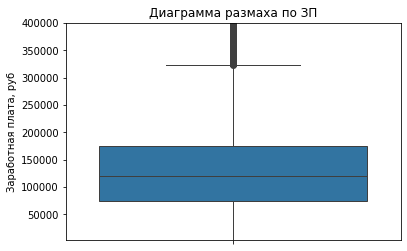

In [40]:
# Построим диаграмму размаха по ЗП 
sns.boxplot(data=data['est_salary']).set (title='Диаграмма размаха по ЗП')
plt.ylim(2500,400000);
plt.ylabel('Заработная плата, руб');
plt.show()

In [41]:
# Сколько в % клиентов с ЗП выше 95 перцентиля
salary_thr = data['est_salary'].quantile(0.95)
(((data['est_salary'] > salary_thr).sum()/len(data))*100).round(2)

5.0

In [42]:
# Посмотрим влияют ли эти выбросы на медиану и средние.
data.select_dtypes(include=[np.number]).median()

user_id         172,651.00
score               853.00
age                  40.00
equity                3.00
balance         524,295.33
products              2.00
credit_card           1.00
last_activity         1.00
est_salary      119,643.00
churn                 0.00
Ростов                0.00
Рыбинск               0.00
Ярославль             1.00
women                 0.00
men                   1.00
dtype: float64

In [43]:
data.select_dtypes(include=[np.number]).mean()

user_id         171,757.62
score               848.67
age                  42.73
equity                2.63
balance         827,245.59
products              1.87
credit_card           0.68
last_activity         0.52
est_salary      147,798.62
churn                 0.18
Ростов                0.14
Рыбинск               0.27
Ярославль             0.59
women                 0.50
men                   0.50
dtype: float64

In [44]:
data.select_dtypes(include=[np.number])[data.select_dtypes(include=[np.number])['est_salary'] <= salary_thr].median()

user_id         172,743.50
score               850.00
age                  40.00
equity                3.00
balance         511,728.80
products              2.00
credit_card           1.00
last_activity         1.00
est_salary      115,245.00
churn                 0.00
Ростов                0.00
Рыбинск               0.00
Ярославль             1.00
women                 1.00
men                   0.00
dtype: float64

In [45]:
data.select_dtypes(include=[np.number])[data.select_dtypes(include=[np.number])['est_salary'] <= salary_thr].mean()

user_id         171,767.61
score               846.92
age                  42.78
equity                2.68
balance         737,209.00
products              1.89
credit_card           0.68
last_activity         0.52
est_salary      122,962.16
churn                 0.18
Ростов                0.15
Рыбинск               0.27
Ярославль             0.58
women                 0.50
men                   0.50
dtype: float64

Выбросов в данном столбце 5 %. Такая доля состоятельных клиентов вполне допустимая вещь. 
Выбросы влияют на среднее - баланса и ЗП

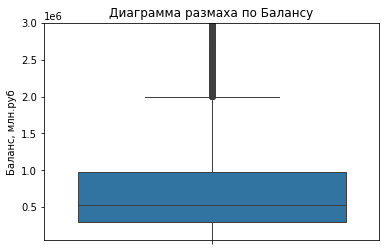

In [46]:
# Построим диаграмму размаха по ЗП 
sns.boxplot(data=data['balance']).set (title='Диаграмма размаха по Балансу')
plt.ylim(50000,3000000);
plt.ylabel('Баланс, млн.руб');
plt.show()

In [47]:
# Сколько в % клиентов имеют баланс выше 95% перцентиля
balance_thr = data['balance'].quantile(0.95)
(((data['balance'] > balance_thr).sum()/len(data))*100).round(2)

3.86

In [48]:
# Посмотрим влияют ли эти выбросы на медиану и средние.
data.select_dtypes(include=[np.number])[data.select_dtypes(include=[np.number])['balance'] <= balance_thr].median()

user_id         172,460.50
score               837.00
age                  40.00
equity                4.00
balance         492,023.98
products              2.00
credit_card           1.00
last_activity         1.00
est_salary      102,925.50
churn                 0.00
Ростов                0.00
Рыбинск               0.00
Ярославль             1.00
women                 1.00
men                   0.00
dtype: float64

In [49]:
data.select_dtypes(include=[np.number])[data.select_dtypes(include=[np.number])['balance'] <= balance_thr].mean()

user_id         171,511.01
score               839.39
age                  42.83
equity                3.35
balance         622,005.39
products              2.06
credit_card           0.65
last_activity         0.51
est_salary      113,297.53
churn                 0.22
Ростов                0.16
Рыбинск               0.28
Ярославль             0.57
women                 0.53
men                   0.47
dtype: float64

Число клиентов с солидным балансом 3,86%  примерно соответствут доле клиентов с высокой ЗП. Данные приемлемы для анализа - основные выбросы можно принять как допустимые. Выбросы влияют на среднее - баланса и ЗП

Столбец user_id содержит идентификационные данные о пользователе, значения в нем уникальны и не могут быть признаками в модели и не участвуют в дальнейшем анализе (в дублях остальные данные различаются). Удалим столбец.

In [50]:
data = data.drop(['user_id'], axis=1)

In [51]:
data.shape

(9973, 16)

### Промежуточные выводы

* Данные во всех колонках были проверены. 
* Все категориальные значения были заменены численными значениями + зарплата (перевели в целое число)
* Мы преобразовали названия колонок, привели к нижнему регистру
* Провели анализ уникальных значений. Было найдено 50 клиентов с одинаковым id/ Города у пользователей с одинаковым идентификатором отличаются. У этих клиентов одинаковый только идентификатор, все остальные показатели отличаются, скорее всего это разные клиенты,возможно, что когда эти клиенты появились,в то время для каждого города была своя СRM и поэтому одинаковые 'user_id'. Удалять не будем.
* В колонке balance мы обнаружили существенное кол-во пропусков (23%). Мы предположили, что пропуски в столбце Баланс говорят об отсутствии таких продуктов банка как дебетовой карты,вклада,накопительного счета и в основной массе характерны для владельцев кредиток. Мы не будем заменять данные значения на нули, т.к. в этом случае в дальнейшем анализе на наших графиках появятся выбросы, а также у нас нет необходимости создавать модель, поэтому пропуски не помешают для выполнения задачи. Оставим пропуски как есть.
* Удалили столбец user_id.
* После всех изменений в таблице осталось 9973 строк и 12 колонок с описанием данных.

# Исследовательский анализ данных

In [52]:
#функция для отображения значений на графиках
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for c in ax.containers:
                total_sum = np.sum([c.datavalues for c in ax.containers]) # CODE REVIEW
                ratios = c.datavalues / total_sum # CODE REVIEW
                ax.bar_label(c, labels=[f'{r:.1%}' for r in ratios])
             
        elif orient == "h":
            for c in ax.containers:
                total_sum = np.sum([c.datavalues for c in ax.containers])
                ratios = c.datavalues / total_sum
                ax.bar_label(c, labels=[f'{r:.1%}' for r in ratios])

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

### Общий портрет клиентов (распределение клиентов по признакам)

In [53]:
#какие признаки у нас есть, как они распределились
data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,"9,973.00",848.67,65.39,642.00,802.00,853.00,900.00,"1,000.00"
age,"9,973.00",42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,"9,973.00",2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,"7,695.00","827,245.59","1,980,327.41",0.00,"295,698.71","524,295.33","980,051.21","119,113,552.01"
products,"9,973.00",1.87,0.79,1.00,1.00,2.00,2.00,5.00
credit_card,"9,973.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,"9,973.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,"9,973.00","147,798.62","139,287.07","2,546.00","75,252.00","119,643.00","174,499.00","1,395,064.00"
churn,"9,973.00",0.18,0.39,0.00,0.00,0.00,0.00,1.00
Ростов,"9,973.00",0.14,0.35,0.00,0.00,0.00,0.00,1.00


Предварительно:
* cредний балл кредитного скоринга составляет 849
* средний баланс - 827 тыс.руб
* средняя ЗП - 148 тыс.руб
* возраст клиентов колеблется от 18 до 86 лет, средний - 43
* клиент может как не иметь баллов по собственности вовсе, так и 9, в среднем почти 3
* все клиенты пользуются продуктами банка (минимум 1, максимум - 5), среднее 2
* 68% клиентов пользуется кредитной картой банка;
* 52% являются активными клиентами;

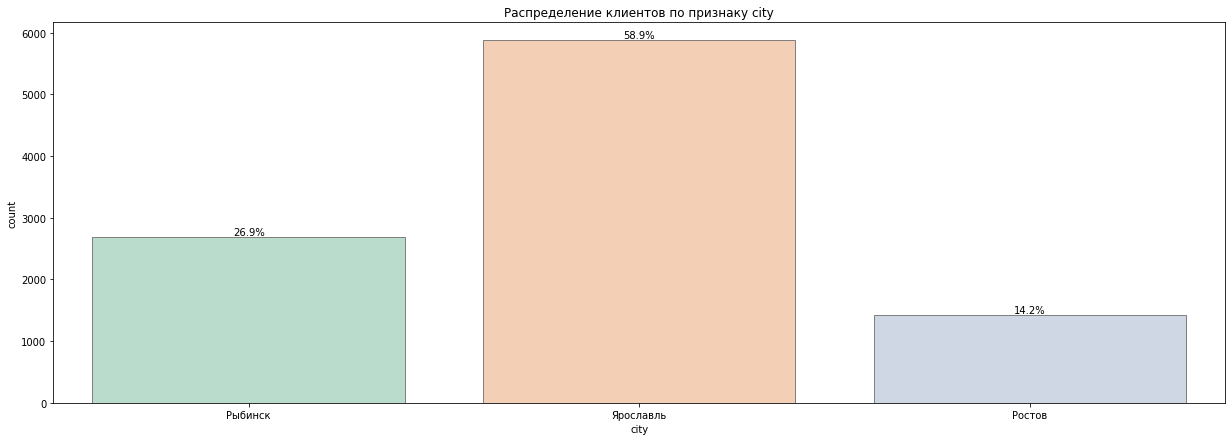

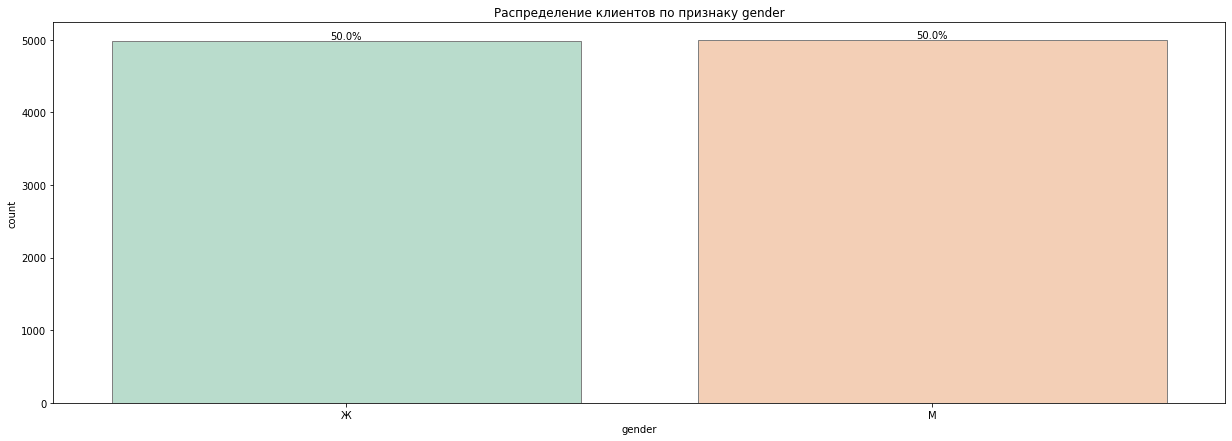

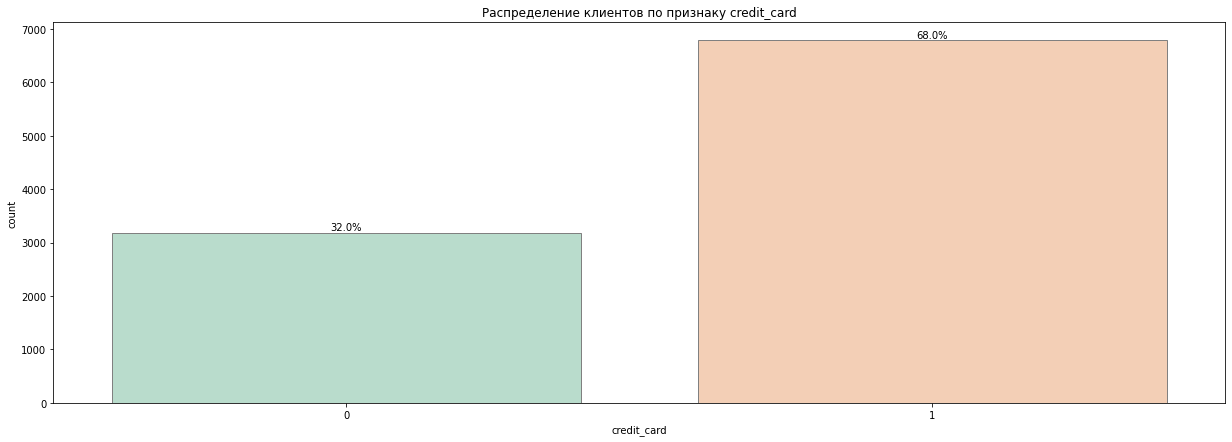

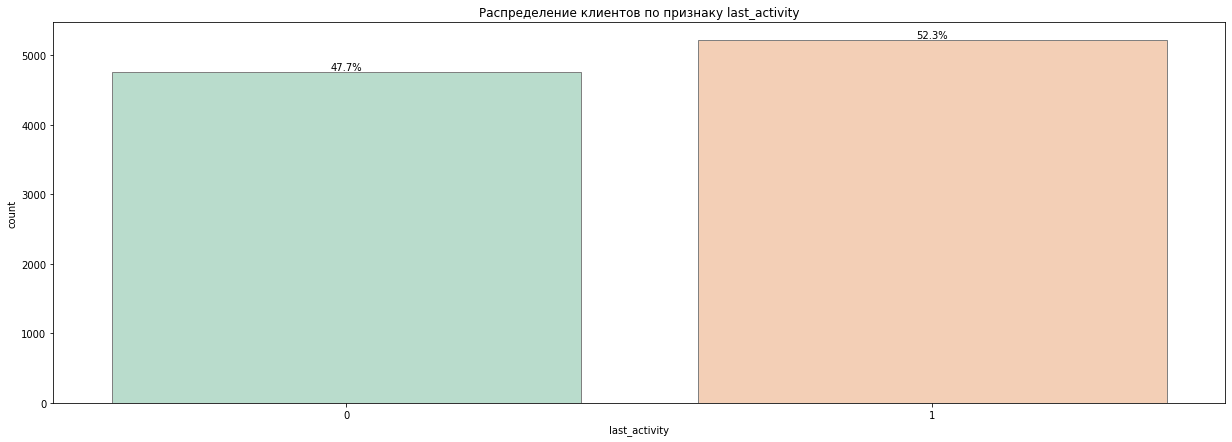

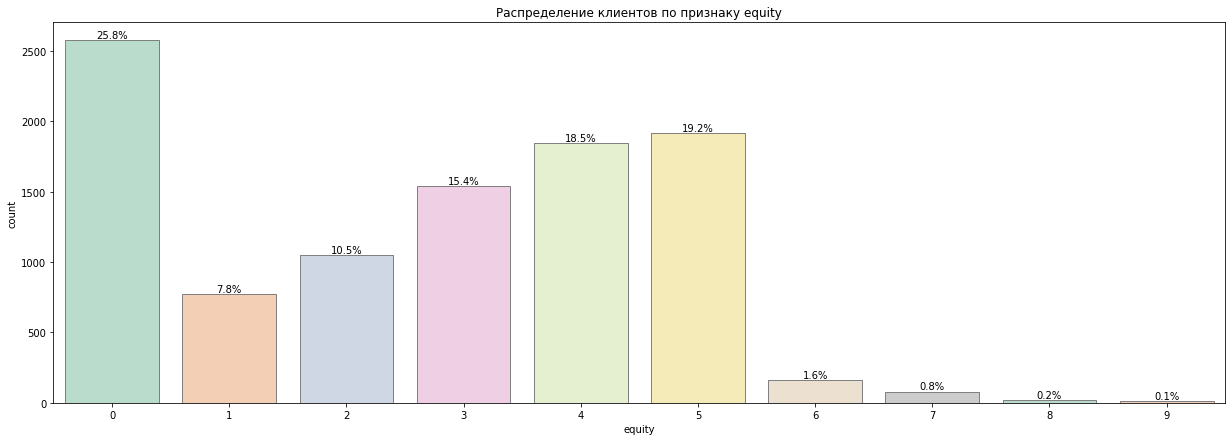

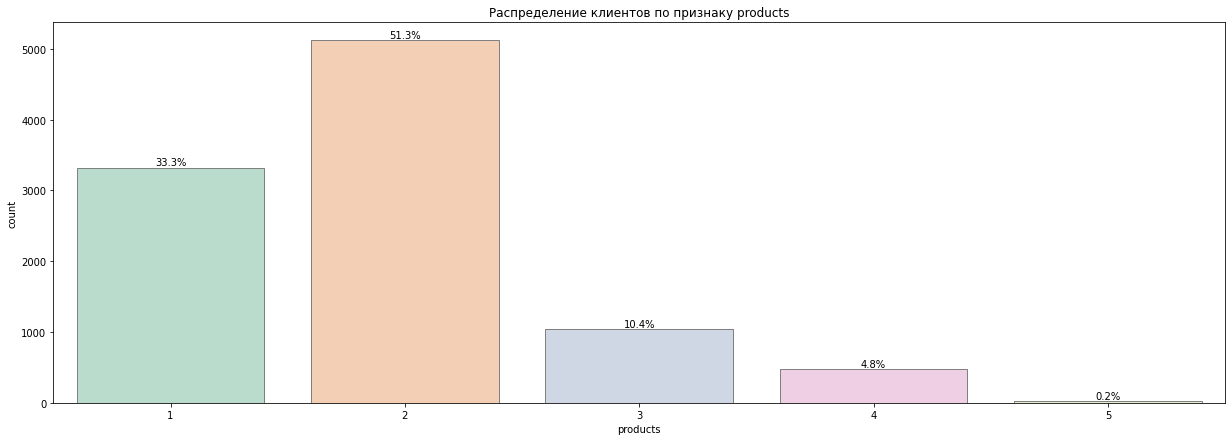

In [54]:
# Для категориальных данных построим столбчатые диаграммы.
for column in ['city', 'gender', 'credit_card', 'last_activity', 'equity', 'products']:
    plt.figure(figsize=(21,7))
    ax=sns.countplot(data, x=column, palette="Pastel2", edgecolor='gray')
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.xticks
    show_values(ax)
    plt.show()

 <a class="anchor" id="31-bullet"></a>

<a class="anchor" id="21-bullet"></a>

Рассмотрим количественные параметры клиентов банка 'score', 'age', 'balance', 'est_salary':

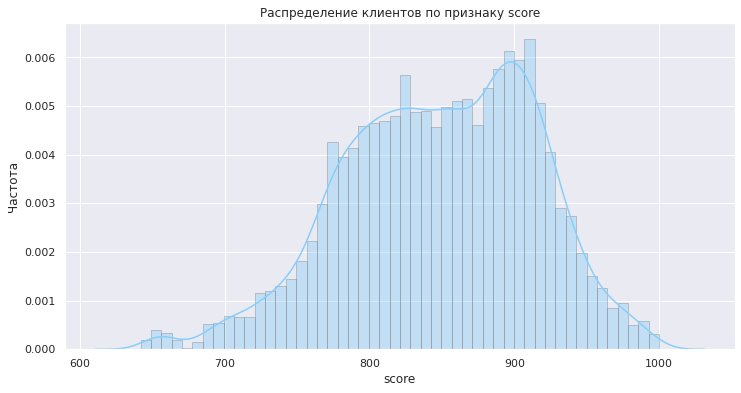

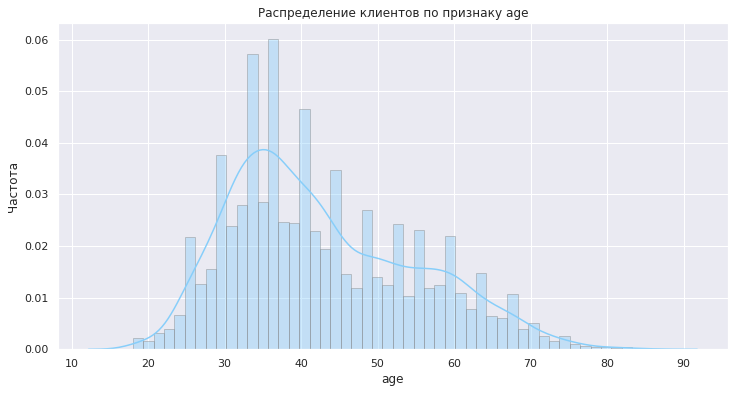

In [55]:
for column in ['score', 'age']:
    sns.set(rc={'figure.figsize':(12,6)})
    sns.distplot(data[column], hist=True,  bins=50, color = 'lightskyblue', hist_kws={'edgecolor':'gray'})
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.ylabel("Частота")
    plt.show()

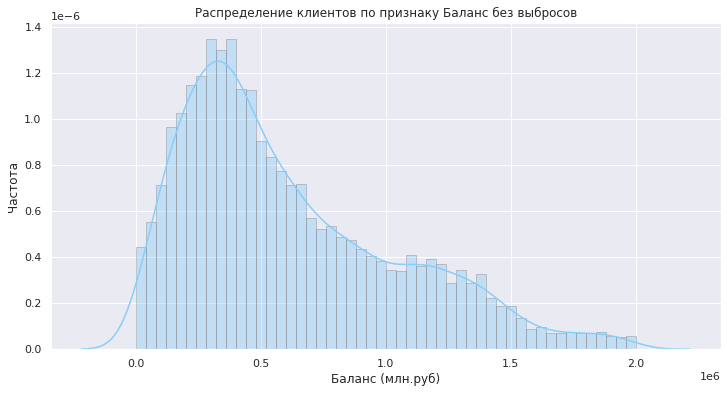

In [56]:
# для исключения смещения на графике из-за больших значений по балансу, исключим выбросы более 2 000 000 (get_ydata здесь не применить т.к. есть пропуски)
balance_good=data[(data['balance'] < 2000000)] # исключаем тех клиентов, у кого на балансе больше 2 000 000
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(balance_good['balance'], hist=True,  bins=50, color = 'lightskyblue', hist_kws={'edgecolor':'gray'})
plt.title(f'Распределение клиентов по признаку Баланс без выбросов')
plt.ylabel("Частота")
plt.xlabel("Баланс (млн.руб)") 
plt.show()

In [57]:
#для исключения смещения на графике из-за больших значений по ЗП, исключим выбросы
#метод get_ydata позволяет взять точные значения границ "усов"
boxplot_data = plt.boxplot(data['est_salary'], autorange=True)
plt.close()
whiskers_area = [item.get_ydata() for item in boxplot_data['whiskers']]
whiskers_area

[array([75252.,  2546.]), array([174499., 323366.])]

In [58]:
salary_good = data.query('est_salary < @whiskers_area[1][1] and est_salary > @whiskers_area[0][1]')[['est_salary']]

In [59]:
salary_good.max()

est_salary    322274
dtype: int64

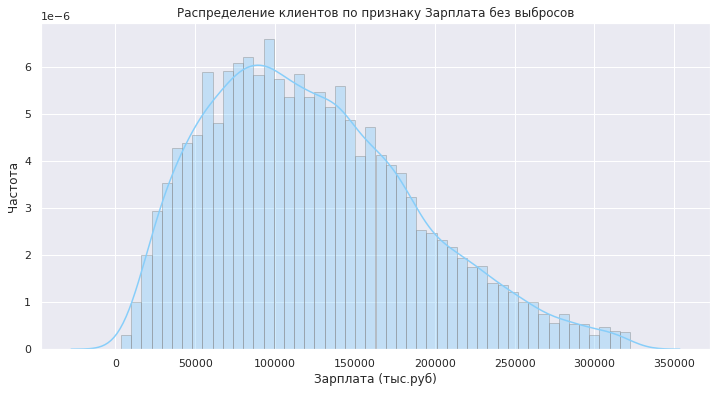

In [60]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(salary_good['est_salary'], hist=True,  bins=50, color = 'lightskyblue', hist_kws={'edgecolor':'gray'})
plt.title(f'Распределение клиентов по признаку Зарплата без выбросов')
plt.ylabel("Частота")
plt.xlabel("Зарплата (тыс.руб)")
plt.show()

### Промежуточные вывод "Общий портрет клиентов"

По данным выше мы можем предварительно составить достаточно обобщенный портрет клиента банка: 

* распределение по полу - мужчин и женщин по 50% 
* 68% клиентов имеют кредитную карту
* чуть больше половины клиентов активны
* почти 26% не имеют недвижимости, 19% имеют 5 объектов, от 1 до 4 - суммарно составляют половину клиентов
* более половины клиентов имеют 2 продукта, и 1/3- 1 продукт
* клиенты в основном надежные и значительная часть имеют баллы кредитного скоринга на уровне 760-940
* основная масса клиентов от 30 до 42 лет
* средние доходы клиентов составляют 80 - 130 тысяч (без учета выбросов)
* в среднем на балансе ок. 400 тысяч. (без учета выбросов)
* большинство клиентов находятся в Ярославле (58,9% клиентов), в Рыбинске в 2 раза меньше (26,9% клиентов) и Ростове - чуть более 14%. 

### Визуализация и распределение признаков для тех, кто ушёл (отток) и тех, кто собирается уйти (сравнение)

In [61]:
#выделим датасет только с  признаками score и age
df1 = data.drop(['city', 'gender', 'credit_card', 'last_activity', 'churn', 'balance', 'est_salary', 'equity', 'products'], axis = 1)

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   score      9973 non-null   int64
 1   age        9973 non-null   int64
 2   Ростов     9973 non-null   int64
 3   Рыбинск    9973 non-null   int64
 4   Ярославль  9973 non-null   int64
 5   women      9973 non-null   int64
 6   men        9973 non-null   int64
dtypes: int64(7)
memory usage: 623.3 KB


In [63]:
#выделим датасет только с остальными признаками
df2 = data.drop(['churn','score','age', 'balance',
                  'est_salary'], axis = 1)

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           9973 non-null   object
 1   gender         9973 non-null   object
 2   equity         9973 non-null   int64 
 3   products       9973 non-null   int64 
 4   credit_card    9973 non-null   int64 
 5   last_activity  9973 non-null   int64 
 6   Ростов         9973 non-null   int64 
 7   Рыбинск        9973 non-null   int64 
 8   Ярославль      9973 non-null   int64 
 9   women          9973 non-null   int64 
 10  men            9973 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 935.0+ KB


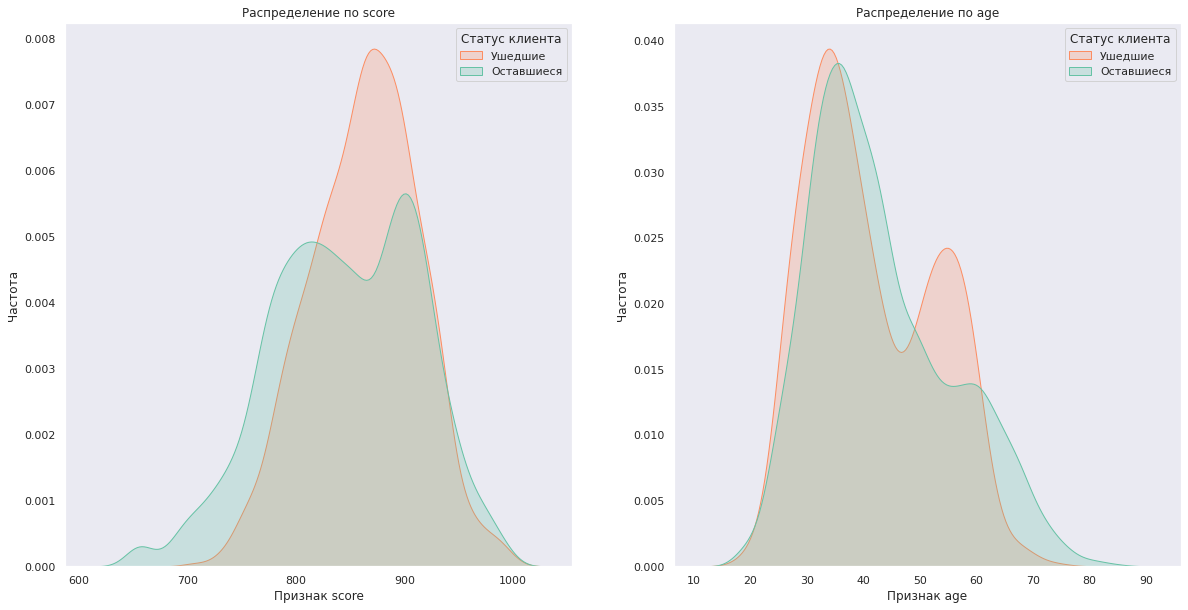

In [65]:
#построим графики распределения методом kdeplot() для score и age

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.3)

for col, ax in zip(df1.columns, axs.ravel()):
    hp = sns.kdeplot(data=data, x=col, hue='churn', palette="Set2", common_norm=False, fill=True, ax=ax)
    
    hp.legend(title='Статус клиента', labels=['Ушедшие', 'Оставшиеся'])
    ax.grid()
    ax.set_title(f'Распределение по {col}')
    ax.set_xlabel(f'Признак {col}')
    ax.set_ylabel('Частота')

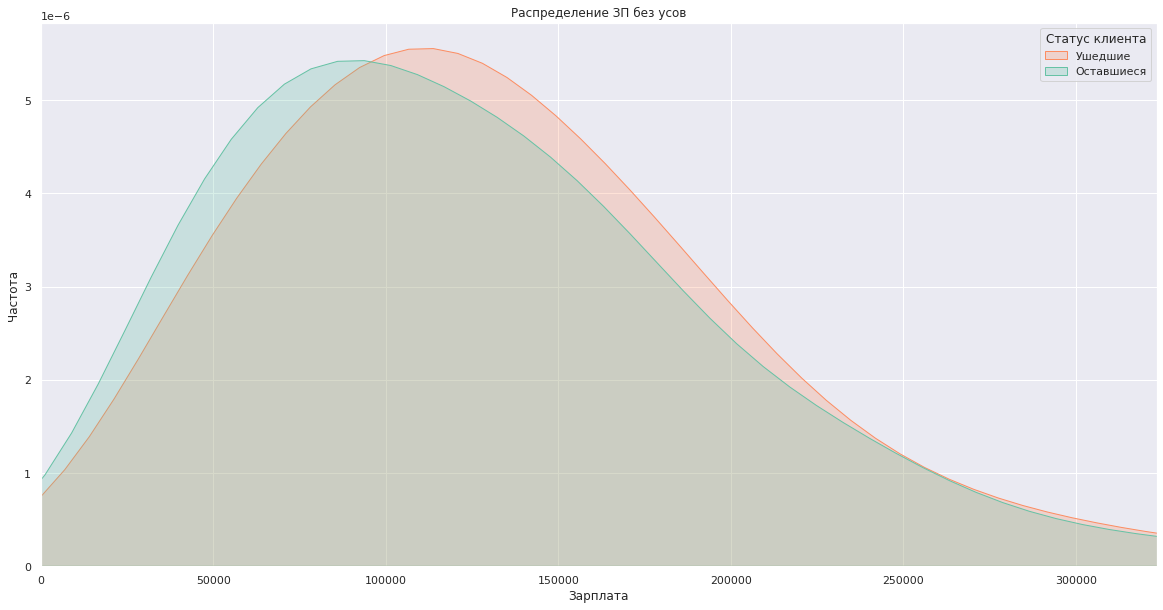

In [66]:
#построим график распределения методом kdeplot() для ЗП без выбросов задав лимиты
plt.figure(figsize=(20, 10))
sns.kdeplot(data=data, x='est_salary', hue='churn', palette="Set2", common_norm=False, fill=True)
plt.title('Распределение ЗП без усов')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.legend(title='Статус клиента', labels=['Ушедшие', 'Оставшиеся'])
plt.xlim([0, 323366])          
plt.show()

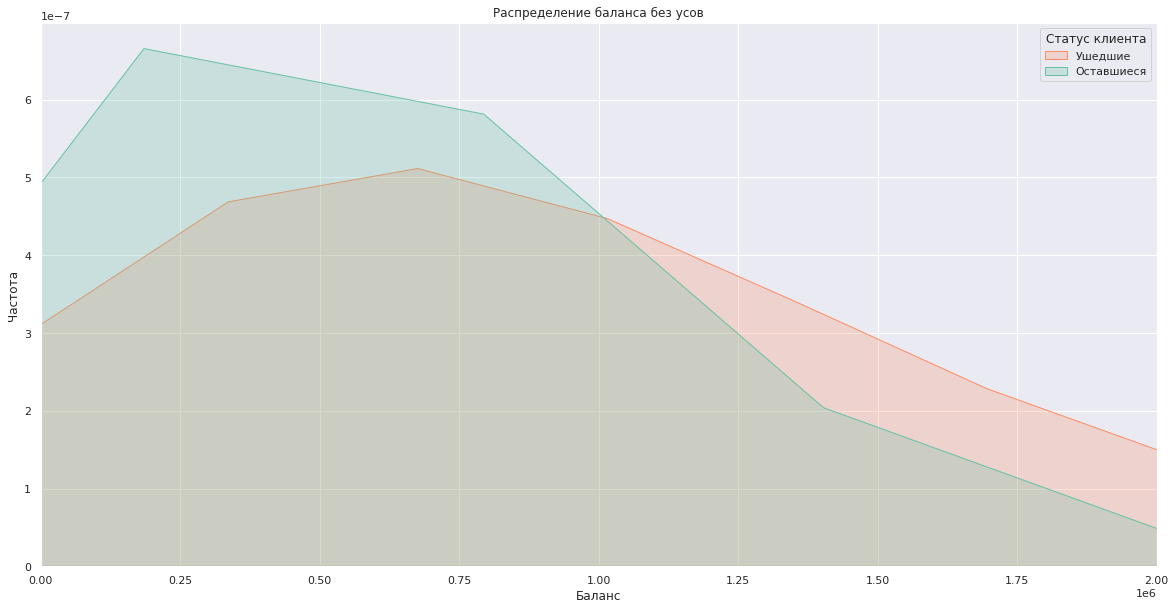

In [67]:
#построим график распределения методом  kdeplot() для баланса без выбросов задав лимиты
plt.figure(figsize=(20, 10))
sns.kdeplot(data=data, x='balance', hue='churn', palette="Set2", common_norm=False, fill=True)
plt.title('Распределение баланса без усов')
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.legend(title='Статус клиента', labels=['Ушедшие', 'Оставшиеся'])
plt.xlim([0, 2000000])          
plt.show()

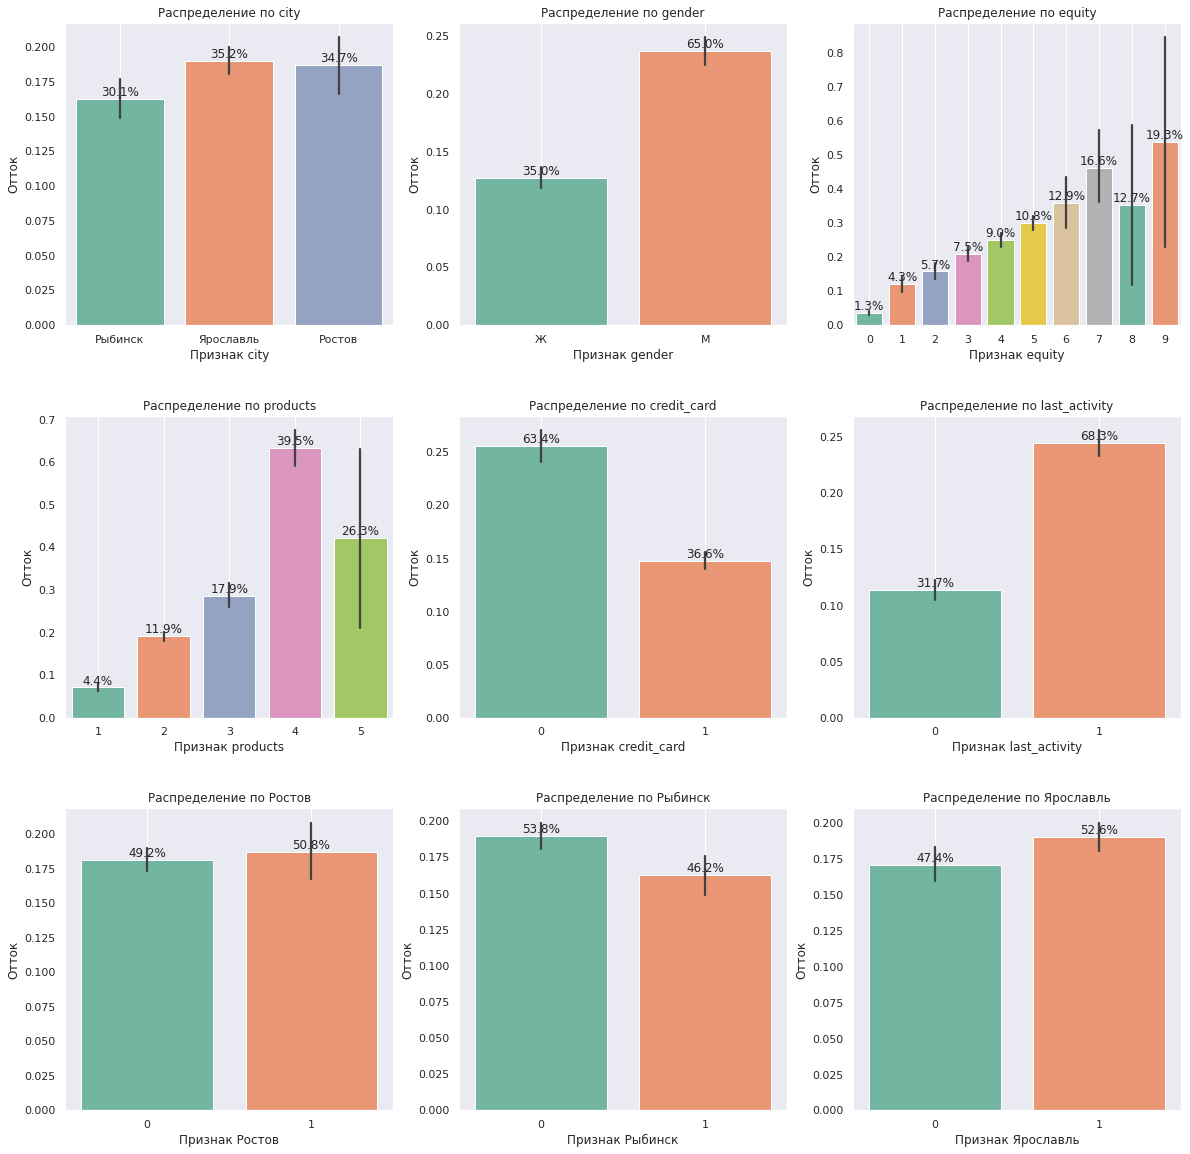

In [68]:
#построим гистограммы распределения методом barplot() для остальных признаков

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

plt.subplots_adjust(hspace=0.3)

for col, ax in zip(df2.columns, axs.ravel()):
    ax = sns.barplot(data=data, x=col, y='churn', palette="Set2", ax=ax)
    ax.grid()
    ax.set_title(f'Распределение по {col}')
    ax.set_xlabel(f'Признак {col}')
    ax.set_ylabel('Отток')
    show_values(ax)

### Промежуточные вывод
Проанализировав графики выше, можно дополнить выводы:

* Возраст большинства ушедших клиентов составляет от 30 до 40 и от 50 до 60
* Большая часть ушедших имела кредитный рейтинг от 820 до 920
* Большее кол-во ушедших клиентов имели баллов оценки собственности 3 и более 
* Число ушедших превышает оставшихся при балансе свыше 1 млн руб
* свыше 3 продуктов - кол-во ушедших превышает оставшихся
* ЗП ушедших в от 100 до 250 тыс руб
* Больше всего ушедших отмечается по г. Ярославль (61%)
* Ушедших мужчин значительно больше - 65% из ушедших
* 55% кто ушел имели кредитку
* 70% ушедших - активные клиенты


### Корреляционный анализ (матрица, влияние на отток)

Рассмотрим корреляции:

метод Спирмена
Коэффициент ранговой корреляции r-Спирмена применяется для исследования корреляционной взаимосвязи между двумя ранговыми переменными. Предполагаем что распределение значений не является нормальным.

для оценки тесноты связи используем шкалу Чеддока:

* менее 0.3 = слабая
* от 0.3 до 0.5 = умеренная
* от 0.5 до 0.7 = заметная
* от 0.7 до 0.9 = высокая
* более 0.9 = очень высокая

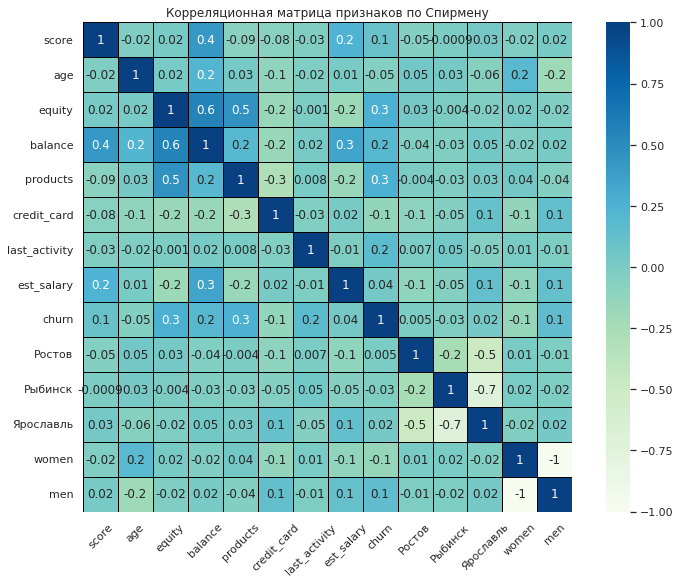

In [70]:
#построим матрицу корреляций, применив метод Спирмена

plt.figure(figsize=(12,9))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(method='spearman'), annot=True, cmap='GnBu', square=True, linewidths=.5, linecolor='black', fmt = '.1g')
plt.title('Корреляционная матрица признаков по Спирмену')
plt.xticks(rotation = 45)
plt.show()

С оттоком слабо-умеренные связи:
- оценка недвижимости
- кол-во продуктов
- баланс
- активность
- мужской пол
- скоринг

Построим отдельно тепловую карту корреляций признаков непосредственно с оттоком:

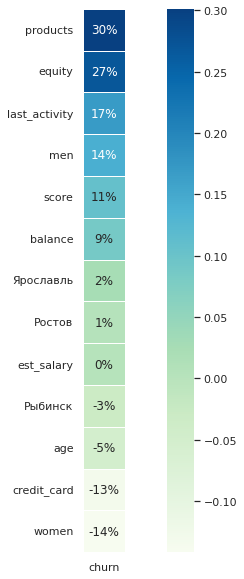

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True)[['churn']].drop('churn').sort_values('churn', ascending=False), linewidths=.5, 
             annot=True, fmt=".0%", cmap='GnBu', square=True);

Здесь выделяются 
- кол-во продуктов
- оценка недвижимости
- активность
- мужской пол
- скоринг
- баланс

Проверим наиболее отличающимиеся признаки отточных и неотточных клиентов

In [72]:
data_new=data.select_dtypes(include=[np.number]).groupby('churn').mean().T
data_new.columns = ['churn_0', 'churn_1']
data_new['share']=(data_new['churn_1']/data_new['churn_0']-1)*100
data_new.sort_values('share', ascending=False)

,churn_0,churn_1,share
equity,2.38,3.76,58.24
balance,"733,031.63","1,134,458.21",54.76
last_activity,0.48,0.70,45.46
men,0.47,0.65,39.35
products,1.76,2.38,35.16
Ярославль,0.58,0.61,5.31
Ростов,0.14,0.15,3.28
score,845.40,863.36,2.13
est_salary,"147,674.15","148,356.98",0.46
age,43.02,41.43,-3.70


Здесь возьмем признаки с дельтой более 10%.

Здесь выделяются 

- оценка недвижимости
- баланс
- активность
- мужской пол
- кол-во продуктов

In [73]:
phik_data = data.phik_matrix(interval_cols = ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'women', 'men', 'Ростов', 'Рыбинск', 'Ярославль'])

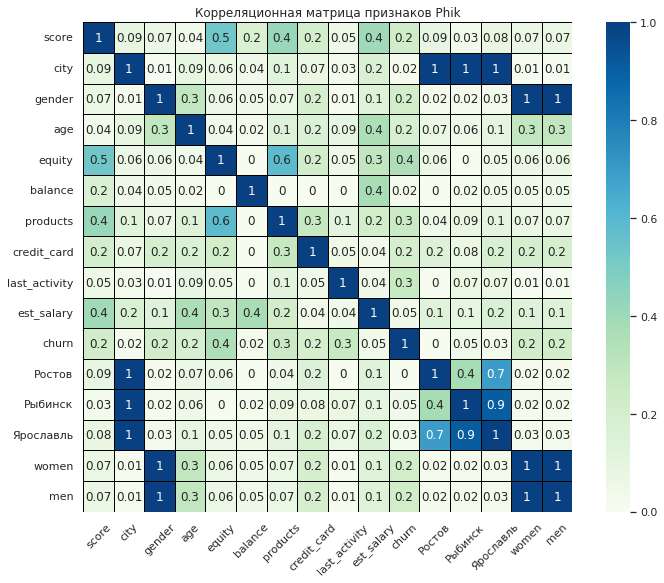

In [74]:
#построим матрицу корреляций, применив метод Phik
plt.figure(figsize=(12,9))
sns.heatmap(phik_data, annot=True, cmap='GnBu', square=True, linewidths=.5, linecolor='black', fmt = '.1g')
plt.title('Корреляционная матрица признаков Phik')
plt.xticks(rotation = 45)
plt.show()

С оттоком слабо-умеренные связи- выделяются:

- оценка недвижимости
- кол-во продуктов
- активность
- пол
- кредитная карта
- возраст
- скоринг

### Промежуточные вывод

Сила корреляцонной зависимости при анализе методом Спирмена целевого показателя - оттока со всеми параметрами довольно слабая.
Сила корреляцонной зависимости при анализе методом Phik целевого показателя - оттока со всеми параметрами довольно слабая и умеренная по активности клиента.

Выделим признаки общие во всех методах выше, имеющие условно суммарно наибольшие значения по связи с оттоком в проведенном анализе:

Группа не вызывающая сомнения:
* активность
* кол-во продуктов
* мужской пол 
* кол-во баллов оценки собственности

Требующая проверки визуализацией и стат.анализом:
* баланс
* кредитная карта
* возраст
* кредитный рейтинг

Рассмотрим связи по отдельности

### Анализ отточных клиентов (распределение - доля ушедших клиентов по признакам)

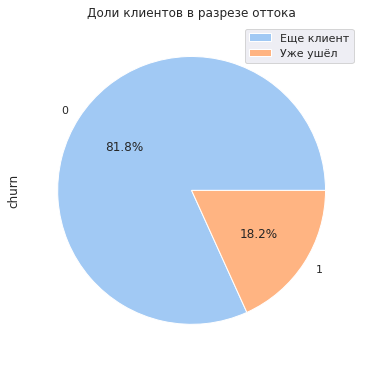

In [75]:
### Определим общий уровень оттока по банку
colors = sns.color_palette('pastel')
churn_perc =  data.groupby('churn').agg({'churn': 'count'})
churn_perc.plot(kind = 'pie',
                subplots=True,
                colors = colors,
                autopct='%1.1f%%',
                figsize= (6,8))
                
plt.title('Доли клиентов в разрезе оттока')
plt.legend(['Еще клиент','Уже ушёл'])
plt.show()

Средний отток по банку 18,2%

In [76]:
def show_values_bars(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

На базе выводов сделанных ранее - визуализируем признаки влияющие на отток относительно несомненно и неоднозначные и требующие проверки

In [77]:
def churn_charts(data, hue):
    for column in ['gender', 'equity', 'products', 'last_activity', 'credit_card']:
        common_churn_level = data['churn'].mean() * 100
        columns_churn = data.groupby(column)['churn'].mean() * 100
        
        plt.figure(figsize=(8, 5))
        plt.axhline(y= common_churn_level, linewidth=2, linestyle='--', color='red')
        ax = columns_churn.plot(kind='bar', color='c', label ='отток')
        plt.xticks(rotation=0)
        plt.title(f'Процент оттока клиентов по категории {column} относительно среднего по банку')
        ax.set_xlabel(f'Признак {column}')
        ax.set_ylabel('Процент ушедших клиентов в целом по банку')
        ax.legend(title='% оттока по признаку')
        show_values_bars(ax)
        plt.show()

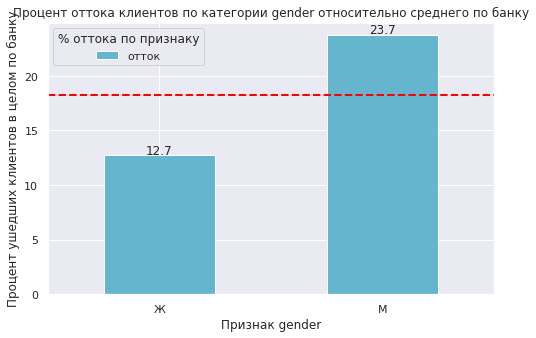

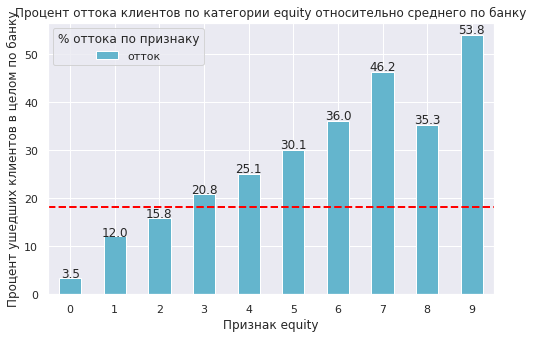

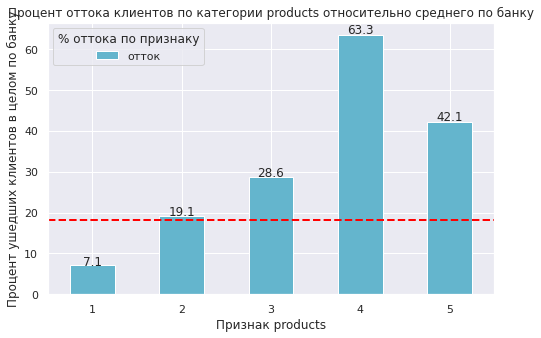

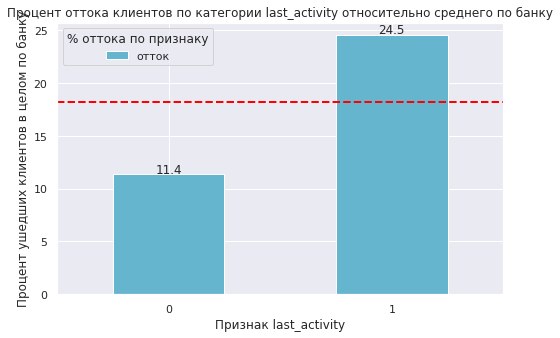

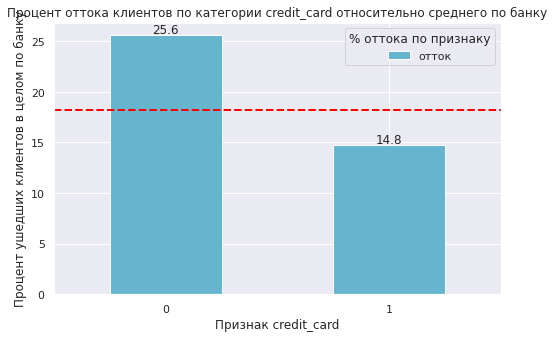

In [78]:
churn_charts(data, 'churn')

 <a class="anchor" id="33-bullet"></a>

In [79]:
#CODE REVIEW
gender_churn = data.groupby('gender').agg({'churn':'mean'})
gender_churn

,churn
gender,
Ж,0.13
М,0.24


**Кредитный рейтинг (скоринг)**

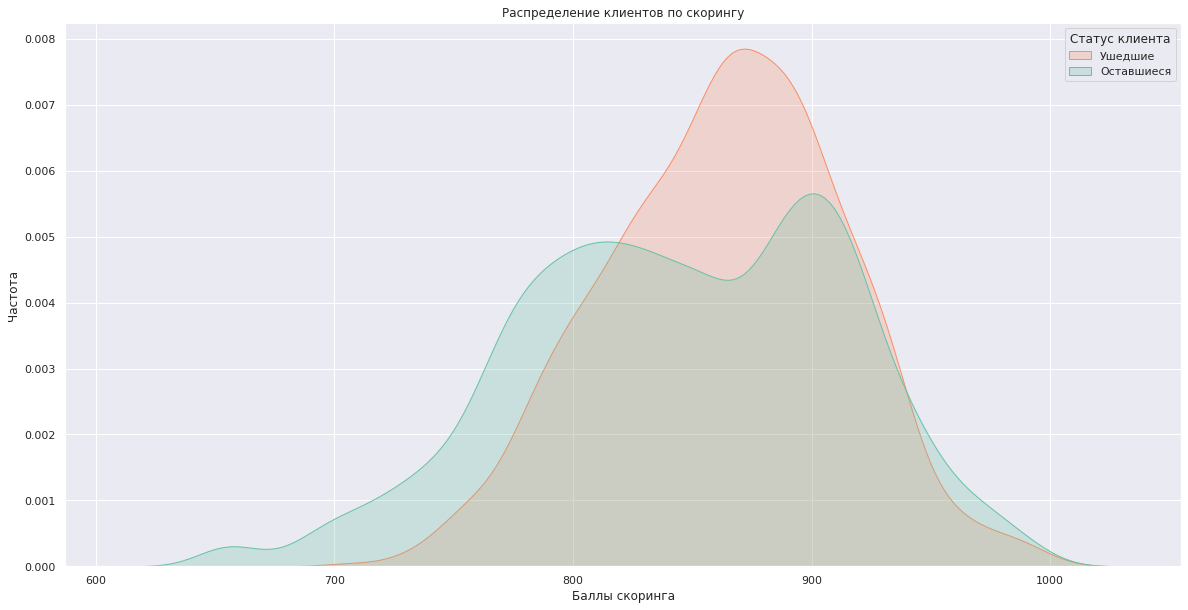

In [81]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data=data, x='score', hue='churn', palette="Set2", common_norm=False, fill=True)
plt.title('Распределение клиентов по скорингу')
plt.xlabel('Баллы скоринга')
plt.ylabel('Частота')
plt.legend(title='Статус клиента', labels=['Ушедшие', 'Оставшиеся'])        
plt.show()

По графику видно, что ушедшие клиенты имели скоринг 820-940 баллов.

**Баланс**

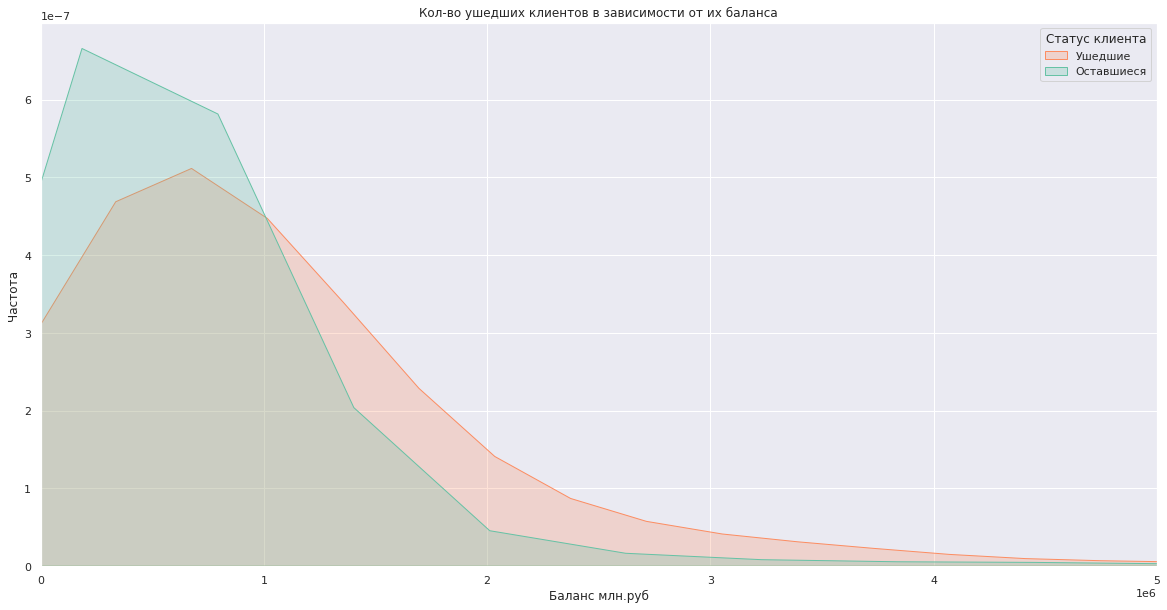

In [82]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data = data, x="balance", hue='churn', palette="Set2", common_norm=False, fill=True)
plt.title('Кол-во ушедших клиентов в зависимости от их баланса')
plt.xlabel('Баланс млн.руб')
plt.ylabel('Частота')
plt.legend(title='Статус клиента', labels=['Ушедшие', 'Оставшиеся'])    
plt.xlim([0, 5000000])
plt.show()

График показывает что кол-во отточных клиентов после баланса в 1 000 000 руб увеличивается относительно текущих.

Дополнительно Рассмотрим **ВОЗРАСТ** ушедших клиентов на базе входящего датасета:

In [83]:
# Посмотрим распределение отточных клиентов по возрасту:
churn_age = data.pivot_table (index = 'age', values = 'churn', aggfunc = ['sum', 'count'])
churn_age.columns = churn_age.columns.droplevel(level=1)

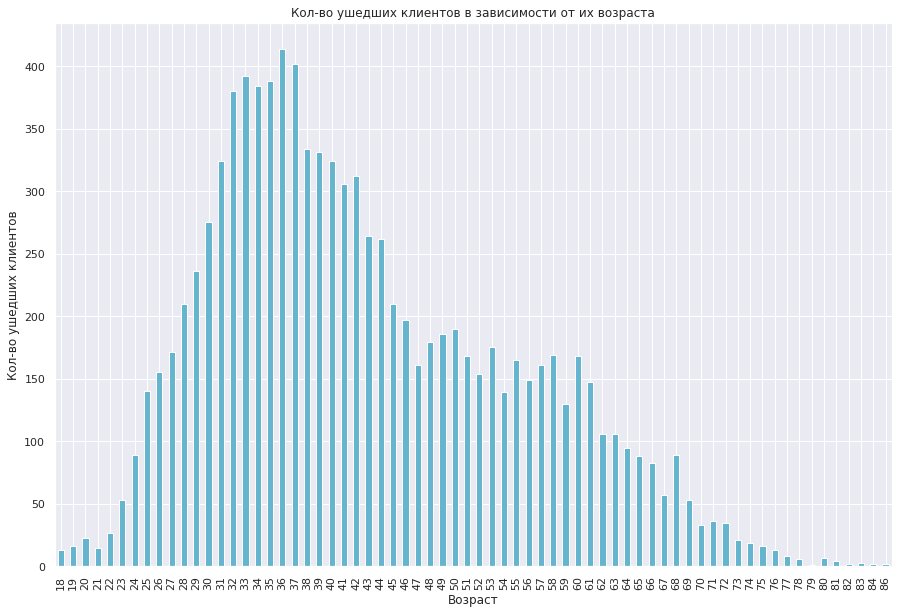

In [84]:
churn_age['count'].plot(x='age', y='count', kind = 'bar', color='c', figsize = (15,10), rot = 90,
                                title = 'Кол-во ушедших клиентов в зависимости от их возраста',
                                xlabel = 'Возраст', 
                                ylabel = 'Кол-во ушедших клиентов');

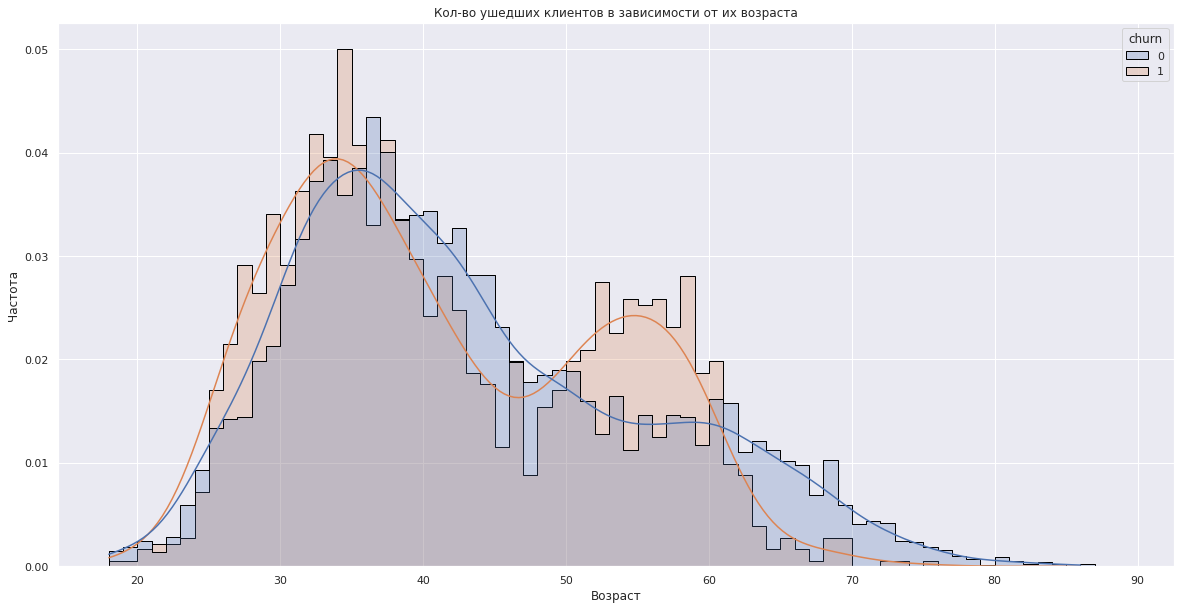

In [85]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x='age', kde=True, hue="churn", element="step", stat="density", common_norm=False,
             edgecolor = 'black', bins=range(18,90))
plt.title('Кол-во ушедших клиентов в зависимости от их возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Разобьём возраст клиентов на 5 групп на базе схожих паттернов на визуализациях:

- 18-25 лет
- 26-37 лет
- 38-50 лет
- 51-61 лет
- 62-86 лет

In [86]:
def age_group(age):
    if 25 >= age >= 18:
        return '18-25'
    if 37 >= age >= 26:
        return '26-37'
    if 50 >= age >= 38:
        return '38-50'
    if 61 >= age >= 51:
        return '51-61' 
    if 62 <= age:
        return '62-86' 
data['age_group'] = data['age'].apply (age_group)

In [87]:
#Посчитаем долю по группам
churn_age_group = data.pivot_table (index = 'age_group', values = 'churn', aggfunc = ['sum', 'count'])
churn_age_group.columns = churn_age_group.columns.droplevel(level=1)
churn_age_group['share'] = churn_age_group['sum']/churn_age_group['count']*100
churn_age_group

,sum,count,share
age_group,,,
18-25,62,376,16.49
26-37,769,3731,20.61
38-50,489,3256,15.02
51-61,450,1725,26.09
62-86,48,885,5.42


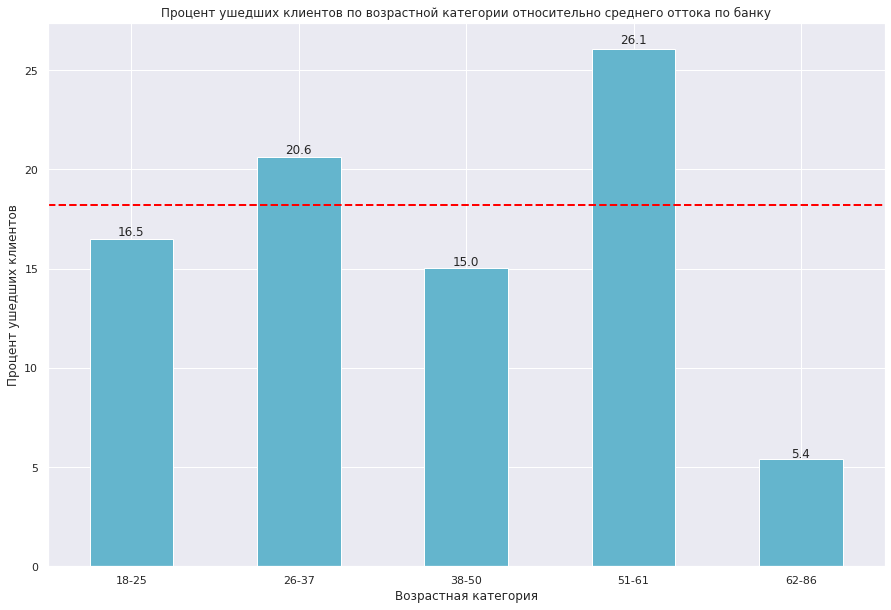

In [88]:
common_churn_level = data['churn'].mean() * 100
ax = churn_age_group['share'].plot(kind = 'bar', color='c', figsize = (15,10), rot = 0,
                          title = 'Процент ушедших клиентов по возрастной категории относительно среднего оттока по банку',
                          xlabel = 'Возрастная категория', 
                          ylabel = 'Процент ушедших клиентов');
plt.axhline (y= common_churn_level, linewidth=2, linestyle='--', color='red');
show_values_bars(ax)
plt.show()

Наиболее отточными клиентами являются люди возрастных категорий 26-37 и 51-61. Самыми менее отточными клиентами являются пожилые люди 62-86 лет.

### Промежуточные выводы

Провели корреляционный анализ несколькими методами.
Выделили признаки общие во всех методах, имеющие условно суммарно наибольшие значения по связи с оттоком в проведенном анализе:
* активность
* кол-во продуктов
* мужской пол (пол)
* кол-во баллов оценки собственности

Визуализировали неоднозначные параметры по корреляционному анализу как:
* возраст
* кредитная карта
* кредитный рейтинг
* баланс

По кредитной карте на базе визуализаций получили информацию о зависимости - Клиенты с кредитными картами уходят в два раза реже, чем клиенты, у которых не было кредитных карт. Включим ее в подтвержденные признаки.

Отток клиентов по кол-ву продуктов:
* Оттоку подвержены клиенты с 3-5 продуктами

Оценки собственности:
* Зависимость практически линейная. Повышение отточности относительно среднего уровня касается клиентов с оценкой собственности 4-9.

Отток по признаку активность:
* Клиенты с повышенной активностью в два раза чаще покидают банк, нежели не активные пользователи. Возможно это из за того что чем больше пользуешься, тем больше можно обнаружить того, что тебе не нравится. А также они могут активно переманиваться другими банками.

Отток по признаку пол:
* Клиенты мужского пола практически в два раза чаще покидают банк, чем женского. Женщины не склонны к оттоку.

Отток по признаку скоринг:
* Высокоотточными клиентами, являются клиенты со скорингом 820-940 баллов.

Отток по признаку кредитная карта:
* Клиенты с кредитными картами уходят в два раза реже, чем клиенты, у которых не было кредитных карт

Отток по признаку баланс:
* Наиболее отточными клиентами являются люди с балансом от 1 млн.

Отток по возрасту:
* Наиболее отточными клиентами являются люди возрастных категорий 26-37 и 51-61. Самыми менее отточными клиентами явлюятся пожилые люди 62-86 лет.

Наиболее отличающимися признаками отточных и неотточных клиентов являются:
- equity — приблизительная оценка собственности клиента. У отточных клиентов оценка собственности выше, чем у неотточных.
- balance — баланс на счёте. У отточных клиентов баланс на счете выше, чем у неотточных.
- last_activity — был ли клиент активен последнее время. Отточные клиенты были более активными в последнее время, чем неотточные
- gender — пол. Отточные клиенты чаще мужчины, реже женщины.
- products — количество продуктов, которыми пользуется клиент. Отточные клиенты пользуются большим кол-вом продуктов банка.

Далее в стат.анализе проверим различаются ли неоднозначные параметры по корреляционному анализу как:
* возраст
* кредитный рейтинг
* баланс

у ушедших и оставшихся клиентов.

# Статистический анализ данных:Проверка гипотез

### Гипотеза 1: Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

In [89]:
#Формирование выборок
data_one_product = data[data['products'] == 1]['age']
data_two_product = data[data['products'] == 2]['age']

In [90]:
#размеры выборок
print(len(data_one_product))
print(len(data_two_product))

3323
5119


In [91]:
#функция для проверки выборочных средних
def sample_mean_func(data):
    sample_mean = []
    for i in range(0,1000):
        sample_mean.append(data.sample(n=100).mean())
    return sample_mean

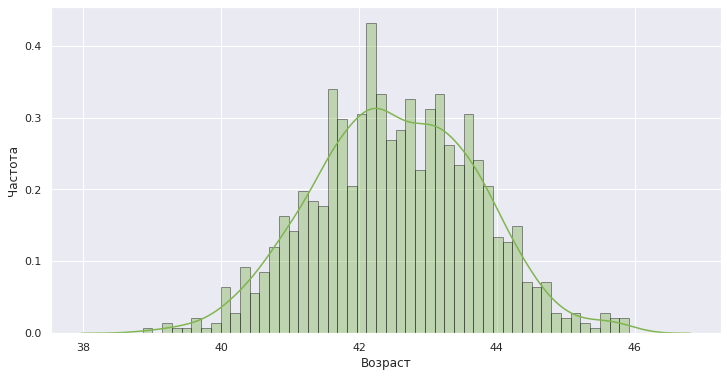

In [92]:
#Распределение выборки
sns.distplot(sample_mean_func(data.loc[data['products'].isin([1, 2]), 'age']),
             hist=True, 
             bins=50,
             color='#7eb54e',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Возраст') 
plt.ylabel('Частота')
plt.show()

In [93]:
#Дисперсия
print('Дисперсия с 1 продуктом:',data_one_product.var())
print('Дисперсия с 2 продуктами:',data_two_product.var())

Дисперсия с 1 продуктом: 143.6857532281439
Дисперсия с 2 продуктами: 147.807660982413


Можно сказать что дисперсии равны

Проведём проверку на нормальность распределения. Для этого выдвинем гипотезу о нормальности распределения переменной с доходами и проверим её, применив критерий Шапиро-Уилка (метод st.shapiro(x)). Критерий при фиксированном уровне значимости обнаруживает различия между распределениями, если они и правда есть:

In [94]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_mean_func(data.loc[data['products'].isin([1, 2]), 'age']))

p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально')
else:
    print('всё нормально')

p-значение:  0.004055576864629984
распределение не нормально


Что мы имеем:
* Генеральные совокупности не должны зависеть друг от друга (1 и 2 группа независимы)
* Выборочные средние должны быть нормально распределены (распределение НЕ нормальное согласно тесту Шапиро)
* Дисперсии рассматриваемых генеральных совокупностей должны быть равны (равны)

На базе вышеизложенного для анализа гипотезы будем применять t-критерий Стьюдента - он применяется для сравнения средних значений двух независимых между собой выборок. И основные условия для t-testa соблюдены. Также в анализируемых выборках отсутствуют выбросы по нашим данным.

**Сформулируем гипотезы так:**

* H_0(нулевая гипотеза): возраст клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним не отличается.
* H_1(альтернативная гипотеза): возраст клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним отличается.

Значение уровня статистической значимости определим в 2,5 %.

In [95]:
alpha = 0.025

results = st.ttest_ind(data_one_product, data_two_product, equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистической разницы в возрасте клиентов нет")

p-значение: 0.03351546829239861
Не получилось отвергнуть нулевую гипотезу, статистической разницы в возрасте клиентов нет


**Вывод:** Не получилось отвергнуть нулевую гипотезу, статистической разницы в возрасте клиентов нет.

Корреляционный анализ показал неоднозначные результаты по связи с оттоком у параметров:

* возраст
* кредитный рейтинг
* баланс

проверим стат.анализом есть ли статистически значимые различия этих признаков у оставшихся и ушедших клиентов, чтобы осуществить корректную сегментацию или дополнить анализ.

### Гипотеза 2: Проверка гипотезы о различии возраста между оставшимися и ушедшими клиентами

In [96]:
#Формирование выборок
data_age_churn0 = data[data['churn'] == 0]['age']
data_age_churn1 = data[data['churn'] == 1]['age']

In [97]:
#размеры выборок
print(len(data_age_churn0))
print(len(data_age_churn1))

8155
1818


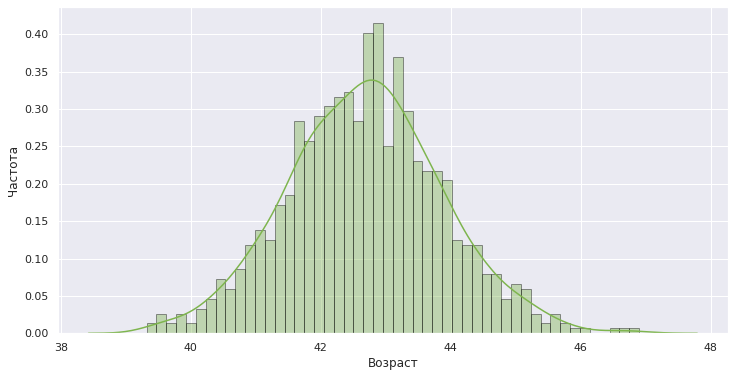

In [98]:
#Распределение выборки возраста клиентов к оттоку
sns.distplot(sample_mean_func(data.loc[data['churn'].isin([0, 1]), 'age']),
             hist=True, 
             bins=50,
             color='#7eb54e',
             hist_kws={'edgecolor':'black'})
plt.xlabel("Возраст") 
plt.ylabel("Частота")
plt.show()

In [99]:
#проведём проверку на нормальность распределения, применив критерий Шапиро-Уилка:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_mean_func(data.loc[data['churn'].isin([0, 1]), 'age']))
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально')
else:
    print('всё нормально')

p-значение:  0.6162761449813843
всё нормально


In [100]:
#Дисперсия
print('Дисперсия возраста действ.клиентов:',data_age_churn0.var())
print('Дисперсия возраста тех кто ушел:',data_age_churn1.var())

Дисперсия возраста действ.клиентов: 153.14575130756242
Дисперсия возраста тех кто ушел: 124.20555195310395


Дисперсии отличаются.

Что мы имеем:
* Генеральные совокупности не должны зависеть друг от друга (1 и 2 группа независимы)
* Выборочные средние должны быть нормально распределены (распределение НЕ нормальное согласно тесту Шапиро)
* Дисперсии рассматриваемых генеральных совокупностей должны быть равны (НЕ равны)

Значение уровня статистической значимости определим в 2,5 %.

На базе вышеизложенного для анализа гипотезы будем применять t-критерий Стьюдента применяется для сравнения средних значений двух независимых между собой выборок с параметром equal_var=False т.к. дисперсии не равны.

**Сформулируем гипотезы так:**

* H_0(нулевая гипотеза): средний возраст, оставшихся и ушедших клиентов НЕ является статистически значимым.
* H_1(альтернативная гипотеза): средний возраст, оставшихся и ушедших клиентов является статистически значимым.

In [101]:
alpha = 0.025

results = st.ttest_ind(data_age_churn0, data_age_churn1, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистической разницы в возрасте клиентов нет")

p-значение: 7.536127357312234e-08
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод:**
Отвергаем нулевую гипотезу: возраст оставшихся и ушедших клиентов является статистически значимой величиной - есть различия в  возрасте оставшихся и ушедших клиентов. Дополним анализ возраста по отточным клиентам.

### Гипотеза 3: Проверка гипотезы о различии скоринга между теми клиентами, которые ушли и теми, которые остались.

In [102]:
#Формирование выборок
data_score_churn0 = data[data['churn']==0]['score']
data_score_churn1 = data[data['churn']==1]['score']

In [103]:
#размеры выборок
print(len(data_score_churn0))
print(len(data_score_churn1))

8155
1818


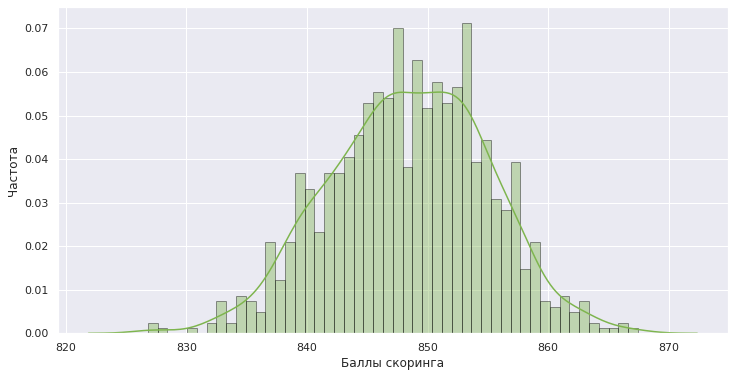

In [104]:
#Распределение выборки скоринга клиентов к оттоку
sns.distplot(sample_mean_func(data.loc[data['churn'].isin([0, 1]), 'score']),
             hist=True, 
             bins=50,
             color='#7eb54e',
             hist_kws={'edgecolor':'black'})
plt.xlabel("Баллы скоринга") 
plt.ylabel("Частота")
plt.show()

In [105]:
#проведём проверку на нормальность распределения, применив критерий Шапиро-Уилка:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_mean_func(data.loc[data['churn'].isin([0, 1]), 'age']))
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально')
else:
    print('всё нормально')

p-значение:  0.3316733241081238
всё нормально


In [106]:
#Дисперсия
print('Дисперсия скоринга действ.клиентов:', data_score_churn0.var())
print('Дисперсия скоринга тех кто ушел:', data_score_churn1.var())

Дисперсия скоринга действ.клиентов: 4623.062654176869
Дисперсия скоринга тех кто ушел: 2458.2453747851396


Дисперсии не равны.

Что мы имеем:
* Генеральные совокупности не должны зависеть друг от друга (1 и 2 группа независимы)
* Выборочные средние должны быть нормально распределены (распределение НЕ нормальное согласно тесту Шапиро)
* Дисперсии рассматриваемых генеральных совокупностей должны быть равны (НЕ равны)

**Сформулируем гипотезы так:**

* H_0: Средний скоринг клиентов, которые ушли, равен среднему скорингу клиентов, которые остались.
* H_1: Средний скоринг клиентов, которые ушли, не равен среднему скорингу клиентов, которые остались.

Значение уровня статистической значимости определим в 2,5 %.

In [107]:
results = st.ttest_ind(data_score_churn0, data_score_churn1, equal_var=False)

alpha = 0.025

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу, статистической разницы в скоринге клиентов нет')

1.3179430198200596e-37
Отвергаем нулевую гипотезу


**Вывод:**
Отвергаем нулевую гипотезу: статистическая разница в скоринге оставшихся и ушедших клиентов есть. Берем в финальный сет признаков для сегментации.

### Гипотеза 4: Проверка гипотезы о различии баланса между теми клиентами, которые ушли и теми, которые остались.

Т.к. баланс содержит большое кол-во пропусков - NaN что не позволит произвести тест. Удалим пропуски.

In [108]:
df=data.dropna(subset=['balance'])

In [109]:
#Формирование выборок
df_balance_churn0 = df[df['churn']==0]['balance']
df_balance_churn1 = df[df['churn']==1]['balance']

In [110]:
#размеры выборок
print(len(df_balance_churn0))
print(len(df_balance_churn1))

5889
1806


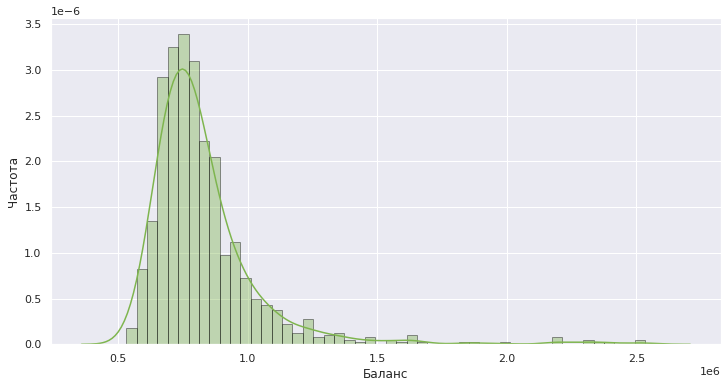

In [111]:
#Распределение выборки баланса клиентов к оттоку
sns.distplot(sample_mean_func(data.loc[data['churn'].isin([0, 1]), 'balance']),
             hist=True, 
             bins=50,
             color='#7eb54e',
             hist_kws={'edgecolor':'black'})
plt.xlabel("Баланс") 
plt.ylabel("Частота")
plt.show()

Распределение носит не нормальный характер

In [112]:
#Дисперсия
print('Дисперсия баланса действ.клиентов:',df_balance_churn0.var())
print('Дисперсия баланса тех кто ушел:',df_balance_churn1.var())

Дисперсия баланса действ.клиентов: 3817930304894.397
Дисперсия баланса тех кто ушел: 4138968690585.886


Дисперсия значительно отличается. 

Так как работа с самими значениями переменной невозможна из-за выбросов, сильно сдвигающих параметрические результаты, и выборки независимы, то применим непараметрический тест U-критерий Манна-Уитни. Ключевая идея этого теста — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки. Преимущество его состоит в том, что мы отказываемся от предположения нормальности распределения и одинаковых дисперсий. Главное отличие u-критерия Манна-Уитни от t-критерия Стьюдента в том, что он работает с рангами — номерами значений в упорядоченном ряду — никак не учитывая сами значения. Поэтому им пользуются тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих результаты. 

**Сформулируем гипотезы так:**

* H_0: Средний баланс клиентов, которые ушли, равен среднему балансу клиентов, которые остались.
* H_1: Средний баланс клиентов, которые ушли, не равен среднему балансу клиентов, которые остались.

In [113]:
results = st.mannwhitneyu (
    df_balance_churn0,
    df_balance_churn1)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу, статистической разницы в балансе клиентов нет')

1.4891162831993242e-70
Отвергаем нулевую гипотезу


**Вывод:**
Отвергаем нулевую гипотезу: статистическая разница в балансе оставшихся и ушедших клиентов есть. Берем баланс в финальный сет влияющих признаков на отток.

### Промежуточный вывод

Провели статистический анализ. Рассмотрели 4 гипотезы.

* **Гипотеза 1:** Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
- **Вывод:** у нас имеются основания полагать, что возраст клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним - НЕ отличается.

* **Гипотеза 2:** Проверка гипотезы о различии возраста между оставшимися и ушедшими клиентами
- **Вывод:**  возраст оставшихся и ушедших клиентов является статистически значимой величиной - есть различия в возрасте оставшихся и ушедших клиентов. Берем в итоговый список возможных признаков, влияющих на отток.

* **Гипотеза 3:** Проверка гипотезы о различии скоринга между теми клиентами, которые ушли и теми, которые остались.
- **Вывод:** Отвергаем нулевую гипотезу: статистическая разница в скоринге оставшихся и ушедших клиентов есть. Берем в итоговый список возможных признаков, влияющих на отток.

* **Гипотеза 4:** Проверка гипотезы о различии баланса между теми клиентами, которые ушли и теми, которые остались.
- **Вывод:** Отвергаем нулевую гипотезу: статистическая разница в балансе оставшихся и ушедших клиентов есть. Берем в итоговый список возможных признаков, влияющих на отток.

# Сегментация клиентов  по количеству потребляемых продуктов, обратите особое внимание на отток.

На базе проведенного анализа мы выявили следующие вводные продуктам и их использованию в банке на базе всех клиент (действующих и оставшихся):

* Более половины клиентов имеют 2 продукта, и 1/3 клиентов- 1 продукт, чуть менее 16% - используют 3-5 продуктов

На базе проведенного анализа мы выявили следующие вводные по связи признаков относительно среднего оттока по банку:

* Оттоку подвержены клиенты с 3-5 продуктами
* Повышение отточности относительно среднего уровня касается клиентов с оценкой собственности 4-9.
* Клиенты с повышенной активностью в два раза чаще покидают банк, нежели не активные пользователи. 
* Клиенты мужского пола практически в два раза чаще покидают банк, чем женского. Женщины не склонны к оттоку.
* Высокоотточными клиентами, являются клиенты со скорингом 820-940 баллов.
* Клиенты с кредитными картами уходят в два раза реже, чем клиенты, у которых не было кредитных карт
* Наиболее отточными клиентами являются люди с балансом от 1 млн.
* Наиболее отточными клиентами являются люди возрастных категорий 26-37 и 51-61. 

* Средний отток по банку 18,2%


### Описание = условие формирования

Выведем графики:

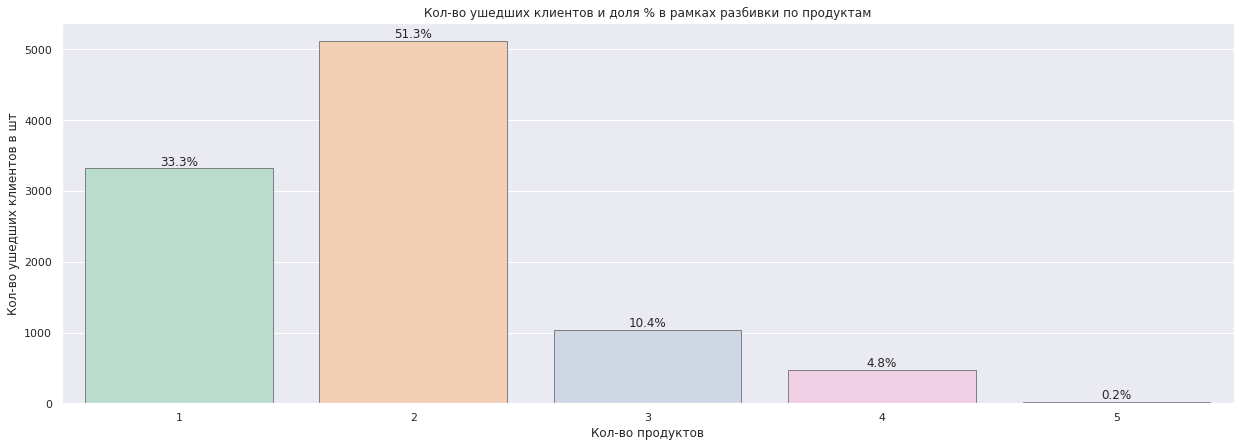

In [114]:
plt.figure(figsize=(21,7))
ax=sns.countplot(data = data, x='products', palette="Pastel2", edgecolor='gray')
plt.xlabel = 'Кол-во продуктов', 
ax.set_ylabel('Кол-во ушедших клиентов в шт')
ax.set_xlabel('Кол-во продуктов')
plt.title('Кол-во ушедших клиентов и доля % в рамках разбивки по продуктам')

show_values(ax)
plt.show()

Итого:
* 1 продукт 33,3%
* 2 продукта 51,3%
* 3-5 продуктов 15,4%

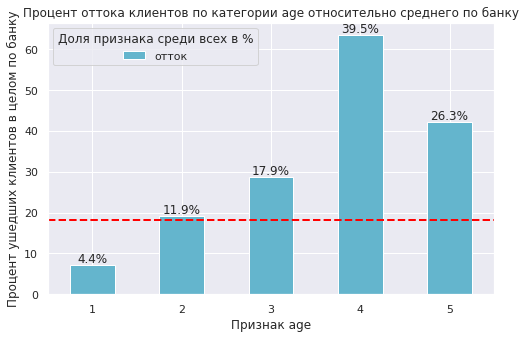

In [115]:
common_churn_level = data['churn'].mean() * 100
columns_churn = data.groupby('products')['churn'].mean() * 100
plt.figure(figsize=(8, 5))
plt.axhline(y= common_churn_level, linewidth=2, linestyle='--', color='red')

ax = columns_churn.plot(kind='bar', color='c', label ='отток')
plt.xticks(rotation=0)
plt.title(f'Процент оттока клиентов по категории {column} относительно среднего по банку')
ax.set_xlabel(f'Признак {column}')
ax.set_ylabel('Процент ушедших клиентов в целом по банку')
ax.legend(title='Доля признака среди всех в %')
show_values(ax)
plt.show()

По паттернам оттока можно аналогично выделить 3 группы:
* 1 продукт - не склонны к оттоку
* 2-3 продукта - превышающие среднее по банку
* 4-5 продуктов - отточная группа - значительно превышающие

In [116]:
def segment (product):
    if product == 1:
        return 'Начальные клиенты'
    elif 2 <= product <= 3:
        return 'Активные клиенты'
    elif product >= 4:
        return 'Премиум клиенты'

In [117]:
#при помощи метода apply() передадим функции столбец products

data['segments'] = data['products'].apply(segment)

In [118]:
# выводим статистику по средним значениям наших признаков по сегментам
segments = data.groupby('segments').mean(numeric_only=True).reset_index().drop(columns=['products'])
segments

,segments,score,age,equity,balance,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,women,men
0,Активные клиенты,843.32,43.27,3.21,"843,697.14",0.58,0.50,"130,112.71",0.21,0.15,0.28,0.57,0.53,0.47
1,Начальные клиенты,854.30,42.20,1.33,"611,006.20",0.86,0.53,"180,604.74",0.07,0.13,0.26,0.61,0.46,0.54
2,Премиум клиенты,877.54,39.66,4.13,"1,242,506.49",0.69,0.79,"147,549.92",0.62,0.15,0.20,0.65,0.38,0.62


**Премиум клиенты с 4 и более продуктами**:  
* имеют наибольший балл скоринга
* возраст ок 40 лет
* оценка баллов собственности 4
* имеют самый большой баланс более 1 млн
* скорее имеют кредитную карту чем нет
* самые активные клиенты
* средняя ЗП ок 150 тыс руб
* самый большой процент оттока 62%
* преимущественно мужчины
* преимущественно проживают в Ярославле

**Начальные клиенты с 1 продуктом**:
* имеют второй по величние кредитный рейтинг из групп 854
* возраст 42 
* оценка баллов собственности наименьшая из групп 
* баланс наименьший из групп чуть более 600 тыс руб
* скорее имеют кредитную карту чем нет
* активность примерно 50/50
* средняя ЗП ок 180 тыс руб - самая высокая из групп
* самый маленький процент оттока 7%
* преимущественно мужчины
* преимущественно проживают в Ярославле

**Активные клиенты с 2-3 продуктами**:
* имеют самый низкий кредитный рейтинг из групп 843
* возраст 43 
* оценка баллов собственности на втором месте из групп -3
* баланс на втором месте из групп 844 тыс руб
* наличие кредитной карты примерно 50/50
* активность примерно 50/50
* средняя ЗП ок 130 тыс руб - самая низкая из групп
* второй из групп процент оттока 21%
* преимущественно женщины
* преимущественно проживают в Ярославле


### Форсмрование сегментов (3) с учетом выявленных признаков оттока и их характеристики (емкость целесообразна 300-1000 чел)

**Сегмент 1:**
* gender) Пол: М
* (age) Возраст: любой
* (city) Город: любой
* (equity) Оценка объектов собственности: 3 и выше
* (score) Скоринговый рейтинг: любой
* (products) Количество используемых продуктов: 3 и больше
* (credit_card) Наличие кредитной карты: не имеет значения
* (last_activity) Пользовательская активность: не имеет значения
* (balance) Баланс на счёте: любой
* (est_salary) Оценочная заработная плата клиента: любая.

**Сегмент 2:**
* (gender) Пол: М
* (age) Возраст: любой
* (city) Город: любой
* (equity) Оценка объектов собственности: любое
* (score) Скоринговый рейтинг: любой
* (products) Количество используемых продуктов: любое
* (credit_card) Наличие кредитной карты: нет
* (last_activity) Пользовательская активность: да
* (balance) Баланс на счёте: любой
* (est_salary) Оценочная заработная плата клиента: любая.

**Сегмент 3:**
* (gender) Пол: любой
* (age) Возраст: 51-61
* (city) Город: любой
* (equity) Оценка объектов собственности: любая
* (score) Скоринговый рейтинг: от 820 баллов
* (products) Количество используемых продуктов: любое
* (credit_card) Наличие кредитной карты: не имеет значения
* (last_activity) Пользовательская активность: не имеет значения
* (balance) Баланс на счёте: от 1 млн
* (est_salary) Оценочная заработная плата клиента: любая.


 <a class="anchor" id="34-bullet"></a>

In [119]:
print('Сегмент 1')
print('Процент оттока: {:.2%}'.format(data.query('men == 1 and equity >= 3 and products >= 3')['churn'].mean()))
print('Размер группы:', data.query('men == 1 and equity >= 3 and products >= 3')['churn'].count())

Сегмент 1
Процент оттока: 53.81%
Размер группы: 617


In [120]:
print('Сегмент 2')
print('Процент оттока: {:.2%}'.format(data.query('women == 1 and credit_card == 0 and last_activity == 1')['churn'].mean()))
print('Размер группы:', data.query('women == 1 and credit_card == 0 and last_activity == 1')['churn'].count())

Сегмент 2
Процент оттока: 30.19%
Размер группы: 1027


In [121]:
print('Сегмент 3')
print('Процент оттока: {:.2%}'.format(data.query('51 <= age <= 61 and score > 820 and balance >= 1000000')['churn'].mean()))
print('Размер группы:', data.query('51 <= age <= 61 and score > 820 and balance >= 1000000')['churn'].count())

Сегмент 3
Процент оттока: 51.28%
Размер группы: 351


### Промежуточный вывод:

* проанализировали группы клиентов разбивке по кол-ву продуктов:

**Премиум клиенты с 4 и более продуктами:**

- имеют наибольший балл скоринга
- возраст ок 40 лет
- оценка баллов собственности 4
- имеют самый большой баланс более 1 млн
- скорее имеют кредитную карту чем нет
- самые активные клиенты
- средняя ЗП ок 150 тыс руб
- самый большой процент оттока 62%
- преимущественно мужчины
- преимущественно проживают в Ярославле

**Начальные клиенты с 1 продуктом:**

- имеют второй по величние кредитный рейтинг из групп 854
- возраст 42
- оценка баллов собственности наименьшая из групп
- баланс наименьший из групп чуть более 600 тыс руб
- скорее имеют кредитную карту чем нет
- активность примерно 50/50
- средняя ЗП ок 180 тыс руб - самая высокая из групп
- самый маленький процент оттока 7%
- преимущественно мужчины
- преимущественно проживают в Ярославле

**Активные клиенты с 2-3 продуктами:**

- имеют самый низкий кредитный рейтинг из групп 843
- возраст 43
- оценка баллов собственности на втором месте из групп -3
- баланс на втором месте из групп 844 тыс руб
- наличие кредитной карты примерно 50/50
- активность примерно 50/50
- средняя ЗП ок 130 тыс руб - самая низкая из групп
- второй из групп процент оттока 21%
- преимущественно женщины
- преимущественно проживают в Ярославле


**Сформировали 3 сегмента и задействовали все 8 признаков влияющих на отток:**


**Сегмент 1:**
* (gender) Пол: М
* (age) Возраст: любой
* (city) Город: любой
* (equity) Оценка объектов собственности: 3 и выше
* (score) Скоринговый рейтинг: любой
* (products) Количество используемых продуктов: 3 и больше
* (credit_card) Наличие кредитной карты: не имеет значения
* (last_activity) Пользовательская активность: не имеет значения
* (balance) Баланс на счёте: любой
* (est_salary) Оценочная заработная плата клиента: любая.

- Процент оттока: 53.81%
- Размер группы: 617

**Сегмент 2:**
* (gender) Пол: Ж
* (age) Возраст: любой
* (city) Город: любой
* (equity) Оценка объектов собственности: любое
* (score) Скоринговый рейтинг: любой
* (products) Количество используемых продуктов: любое
* (credit_card) Наличие кредитной карты: нет
* (last_activity) Пользовательская активность: да
* (balance) Баланс на счёте: любой
* (est_salary) Оценочная заработная плата клиента: любая.

- Процент оттока: 30.19%
- Размер группы: 1027

**Сегмент 3:**
* (gender) Пол: любой
* (age) Возраст: 51-61
* (city) Город: любой
* (equity) Оценка объектов собственности: любая
* (score) Скоринговый рейтинг: от 820 баллов
* (products) Количество используемых продуктов: любое
* (credit_card) Наличие кредитной карты: не имеет значения
* (last_activity) Пользовательская активность: не имеет значения
* (balance) Баланс на счёте: от 1 млн
* (est_salary) Оценочная заработная плата клиента: любая.

- Процент оттока: 51.28%
- Размер группы: 351


Процент оттока по 1 и 3 сегментам ориентировочно в 3 раза превышает средний по банку 18%, самый низкий 30% у группы где только женщины (сегмент 2) = признаки влияющие на отток отобрали верно.

# Выводы и рекомендации отделу маркетинга.

Портрет продуктовых групп клиентов:

**Премиум клиенты с 4 и более продуктами:**

- имеют наибольший балл скоринга
- возраст ок 40 лет
- оценка баллов собственности 4
- имеют самый большой баланс более 1 млн
- скорее имеют кредитную карту чем нет
- самые активные клиенты
- средняя ЗП ок 150 тыс руб
- самый большой процент оттока 62%
- преимущественно мужчины
- преимущественно проживают в Ярославле

**Начальные клиенты с 1 продуктом:**

- имеют второй по величние кредитный рейтинг из групп 854
- возраст 42
- оценка баллов собственности наименьшая из групп
- баланс наименьший из групп чуть более 600 тыс руб
- скорее имеют кредитную карту чем нет
- активность примерно 50/50
- средняя ЗП ок 180 тыс руб - самая высокая из групп
- самый маленький процент оттока 7%
- преимущественно мужчины
- преимущественно проживают в Ярославле

**Активные клиенты с 2-3 продуктами:**

- имеют самый низкий кредитный рейтинг из групп 843
- возраст 43
- оценка баллов собственности на втором месте из групп -3
- баланс на втором месте из групп 844 тыс руб
- наличие кредитной карты примерно 50/50
- активность примерно 50/50
- средняя ЗП ок 130 тыс руб - самая низкая из групп
- второй из групп процент оттока 21%
- преимущественно женщины
- преимущественно проживают в Ярославле


На базе проведенного анализа мы выявили следующие вводные по связи признаков относительно среднего оттока по банку и проверили их на 3 тестовых сегментах (портрет клиента склонного к оттоку):

* Оттоку подвержены клиенты с 3-5 продуктами
* Повышение отточности относительно среднего уровня касается клиентов с оценкой собственности 4-9.
* Клиенты с повышенной активностью в два раза чаще покидают банк, нежели не активные пользователи. 
* Клиенты мужского пола практически в два раза чаще покидают банк, чем женского. Женщины не склонны к оттоку.
* Высокоотточными клиентами, являются клиенты со скорингом 820-940 баллов.
* Клиенты с кредитными картами уходят в два раза реже, чем клиенты, у которых не было кредитных карт
* Наиболее отточными клиентами являются люди с балансом от 1 млн.
* Наиболее отточными клиентами являются люди возрастных категорий 26-37 и 51-61. 

**Средний отток по банку 18,2%**

**Рекомендации по снижению оттока:**

✔️ Разработать банковские продукты для возрастной категории 26-37 и 51-61.(например,  карты/вклады на особых условиях, повышенный кэшбэк на определенные категории).

✔️ Проанализировать условия обслуживания ПРЕМИУМ-клиентов/ в т.ч. с высоким балансом (имеются ли персональные менеджеры, отдельный комфортный зал ожидания, проанализировать предоставляемые инд.условия - т.к. этот сегмент клиентов востребован другими банками и отток возможно связан с более выгодными предложениями банков-конкурентов). Продумать необходимость создания продукта инвестиций, вклады, сектора Private Banking для сегмента HNWI.

✔️ Для клиентов с высокими баллами оценки собственности - разработать продукты под залог недвижимости/ продукты для покупки недвижимости.

✔️ Для мужчин - продумать возможность "мужских" карт с особыми условиями. Варианты кэшбэка на товары - охота, рыбалка, авто.

✔️ Для клиентов БЕЗ кредитной карты - акцию по бесплатной выдаче карты

✔️ Для клиентов с высокими баллами скоринга - льготные условия кредитования, продукты, бланковые кредиты.


### Формирование конечного результата: что по итогам сдается заказчику

* Рекомендации и визаулизации
* Презентация
* Дашборд